In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)


In [2]:
credit_data=pd.read_csv("./01_dataset.csv")

In [3]:
credit_data.head(10)

customer_id  label  SHORT_TERM_COUNT  MID_TERM_COUNT  LONG_TERM_COUNT  \
0         1639      1              1.00            1.00             1.00   
1        23717      0             10.00            1.00              NaN   
2        19474      0              7.00            7.00              NaN   
3        15505      0              7.00            1.00             1.00   
4         1538      1               NaN             NaN             1.00   
5         8455      0               NaN             NaN             1.00   
6        20339      0              4.00           10.00              NaN   
7         6629      0             19.00            1.00              NaN   
8         9850      0              4.00            4.00              NaN   
9        22474      0              7.00            4.00              NaN   

   SHORT_TERM_COUNT_BANK  MID_TERM_COUNT_BANK  LONG_TERM_COUNT_BANK  \
0                   1.00                 1.00                  1.00   
1                   7.00                 1.00                  1.00   
2                   7.00                  NaN                  1.00   
3                    NaN                 1.00                   NaN   
4                   1.00                 1.00                  1.00   
5                    NaN                 1.00                  1.00   
6                   1.00                 4.00                  1.00   
7                    NaN                 1.00                   NaN   
8                   1.00                 1.00                  1.00   
9                   4.00                  NaN                  1.00   

   SHORT_TERM_COUNT_NON_BANK  MID_TERM_COUNT_NON_BANK  \
0                       1.00                     1.00   
1                       4.00                      NaN   
2                       1.00                     4.00   
3                       7.00                     1.00   
4                       1.00                     4.00   
5                       1.00                     1.00   
6                       4.00                     7.00   
7                      13.00                     1.00   
8                       4.00                     4.00   
9                       4.00                     4.00   

   LONG_TERM_COUNT_NON_BANK  NUMBER_OF_LOANS  NUMBER_OF_LOANS_BANK  \
0                      1.00             1.00                  1.00   
1                       NaN              NaN                  7.00   
2                       NaN            13.00                 10.00   
3                      1.00             7.00                  1.00   
4                      1.00              NaN                  1.00   
5                      1.00             4.00                   NaN   
6                      1.00            13.00                  4.00   
7                      1.00            19.00                  7.00   
8                      1.00             7.00                  1.00   
9                       NaN            10.00                  4.00   

   NUMBER_OF_LOANS_NON_BANK  NUMBER_OF_CREDIT_CARDS  \
0                      1.00                    1.00   
1                      4.00                   10.00   
2                      4.00                    7.00   
3                      7.00                    7.00   
4                       NaN                    4.00   
5                      1.00                    4.00   
6                     10.00                     NaN   
7                     13.00                    1.00   
8                      7.00                    4.00   
9                      7.00                    4.00   

   NUMBER_OF_CREDIT_CARDS_BANK  NUMBER_OF_CREDIT_CARDS_NON_BANK  \
0                         1.00                             1.00   
1                         7.00                             4.00   
2                          NaN                              NaN   
3                         7.00                             1.00   
4                         1.00              

In [4]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 124 entries, customer_id to OUTSTANDING_BAL_ALL_CURRENT
dtypes: float64(122), int64(2)
memory usage: 18.9 MB


In [5]:
credit_data.shape

(20000, 124)

In [6]:
credit_data.columns.tolist()

['customer_id',
 'label',
 'SHORT_TERM_COUNT',
 'MID_TERM_COUNT',
 'LONG_TERM_COUNT',
 'SHORT_TERM_COUNT_BANK',
 'MID_TERM_COUNT_BANK',
 'LONG_TERM_COUNT_BANK',
 'SHORT_TERM_COUNT_NON_BANK',
 'MID_TERM_COUNT_NON_BANK',
 'LONG_TERM_COUNT_NON_BANK',
 'NUMBER_OF_LOANS',
 'NUMBER_OF_LOANS_BANK',
 'NUMBER_OF_LOANS_NON_BANK',
 'NUMBER_OF_CREDIT_CARDS',
 'NUMBER_OF_CREDIT_CARDS_BANK',
 'NUMBER_OF_CREDIT_CARDS_NON_BANK',
 'NUMBER_OF_RELATIONSHIP',
 'NUMBER_OF_RELATIONSHIP_BANK',
 'NUMBER_OF_RELATIONSHIP_NON_BANK',
 'NUM_NEW_LOAN_TAKEN_3M',
 'NUM_NEW_LOAN_TAKEN_6M',
 'NUM_NEW_LOAN_TAKEN_9M',
 'NUM_NEW_LOAN_TAKEN_12M',
 'NUM_NEW_LOAN_TAKEN_BANK_3M',
 'NUM_NEW_LOAN_TAKEN_BANK_6M',
 'NUM_NEW_LOAN_TAKEN_BANK_9M',
 'NUM_NEW_LOAN_TAKEN_BANK_12M',
 'NUM_NEW_LOAN_TAKEN_NON_BANK_3M',
 'NUM_NEW_LOAN_TAKEN_NON_BANK_6M',
 'NUM_NEW_LOAN_TAKEN_NON_BANK_9M',
 'NUM_NEW_LOAN_TAKEN_NON_BANK_12M',
 'OUTSTANDING_BAL_LOAN_CURRENT',
 'OUTSTANDING_BAL_LOAN_3M',
 'OUTSTANDING_BAL_LOAN_6M',
 'OUTSTANDING_BAL_LOAN_9M',


In [7]:
credit_data.describe()

customer_id     label  SHORT_TERM_COUNT  MID_TERM_COUNT  \
count    20,000.00 20,000.00         18,000.00       18,000.00   
mean     12,805.81      0.18              6.04            3.32   
std       7,405.23      0.39              3.62            3.15   
min           0.00      0.00              1.00            1.00   
25%       6,374.75      0.00              4.00            1.00   
50%      12,840.50      0.00              7.00            1.00   
75%      19,206.25      0.00              7.00            4.00   
max      25,659.00      1.00             25.00           25.00   

       LONG_TERM_COUNT  SHORT_TERM_COUNT_BANK  MID_TERM_COUNT_BANK  \
count        18,000.00              18,000.00            18,000.00   
mean              1.06                   3.18                 1.61   
std               0.45                   2.21                 1.55   
min               1.00                   1.00                 1.00   
25%               1.00                   1.00                 1.00   
50%               1.00                   4.00                 1.00   
75%               1.00                   4.00                 1.00   
max               7.00                  13.00                22.00   

       LONG_TERM_COUNT_BANK  SHORT_TERM_COUNT_NON_BANK  \
count             18,000.00                  18,000.00   
mean                   1.06                       3.85   
std                    0.44                       2.55   
min                    1.00                       1.00   
25%                    1.00                       1.00   
50%                    1.00                       4.00   
75%                    1.00                       4.00   
max                    7.00                      16.00   

       MID_TERM_COUNT_NON_BANK  LONG_TERM_COUNT_NON_BANK  NUMBER_OF_LOANS  \
count                18,000.00                 18,000.00        18,000.00   
mean                      2.73                      1.00             8.42   
std                       2.52                      0.09             4.68   
min                       1.00                      1.00             1.00   
25%                       1.00                      1.00             4.00   
50%                       1.00                      1.00             7.00   
75%                       4.00                      1.00            10.00   
max                      19.00                      7.00            34.00   

       NUMBER_OF_LOANS_BANK  NUMBER_OF_LOANS_NON_BANK  NUMBER_OF_CREDIT_CARDS  \
count             18,000.00                 18,000.00               18,000.00   
mean                   3.84                      5.59                    5.29   
std                    2.85                      3.38                    5.29   
min                    1.00                      1.00                    1.00   
25%                    1.00                      4.00                    1.00   
50%                    4.00                      4.00                    4.00   
75%                    4.00                      7.00                    7.00   
max                   25.00                     22.00                   55.00   

       NUMBER_OF_CREDIT_CARDS_BANK  NUMBER_OF_CREDIT_CARDS_NON_BANK  \
count                    18,000.00                        18,000.00   
mean                          4.05                             2.20   
std                           4.72                             1.95   
min                           1.00                             1.00   
25%                           1.00                             1.00   
50%                           1.00                             1.00   
75%                           4.00                             4.00   
max                          55.00                            40.00   

       NUMBER_OF_RELATIONSHIP  NUMBER_OF_RELATIONSHIP_BANK  \
count               18,000.00                    18,000.00   
mean                    12.70                         6.89   
std     

In [8]:
credit_data.isnull().sum()

customer_id                          0
label                                0
SHORT_TERM_COUNT                  2000
MID_TERM_COUNT                    2000
LONG_TERM_COUNT                   2000
                                  ... 
ENQUIRIES_FROM_NON_BANK_6M_9M     2000
ENQUIRIES_FROM_NON_BANK_9M_12M    2000
ENQUIRIES_FROM_NON_BANK_6M_12M    2000
ENQUIRIES_FROM_NON_BANK_3M_12M    2000
OUTSTANDING_BAL_ALL_CURRENT       2000
Length: 124, dtype: int64

In [9]:
label_0=credit_data[credit_data["label"]==0]
label_1=credit_data[credit_data["label"]==1]
n=len(label_0)/len(credit_data["label"])
n_1=len(label_1)/len(credit_data["label"])
print(f"Số khách hàng trả nợ đúng hạn {len(label_0)}")
print(f"Số khách hàng quá hạn trả nợ {len(label_1)}")
print(f"Tỷ lệ số khách hàng trả nợ đúng hạn trên tổng số khách hàng: {n}")
print(f"Tỷ lệ số khách hàng quá hạn trả nợ trên tổng số khách hàng: {n_1}")

Số khách hàng trả nợ đúng hạn 16356
Số khách hàng quá hạn trả nợ 3644
Tỷ lệ số khách hàng trả nợ đúng hạn trên tổng số khách hàng: 0.8178
Tỷ lệ số khách hàng quá hạn trả nợ trên tổng số khách hàng: 0.1822


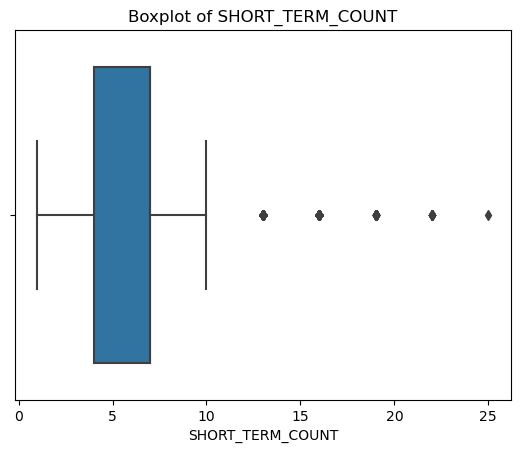

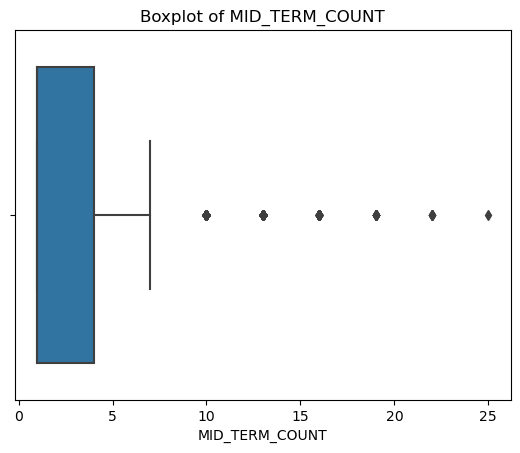

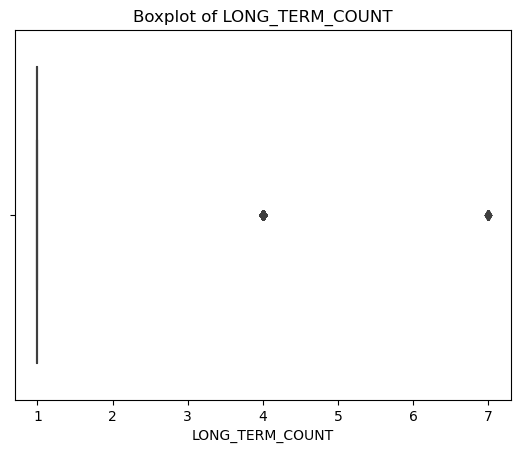

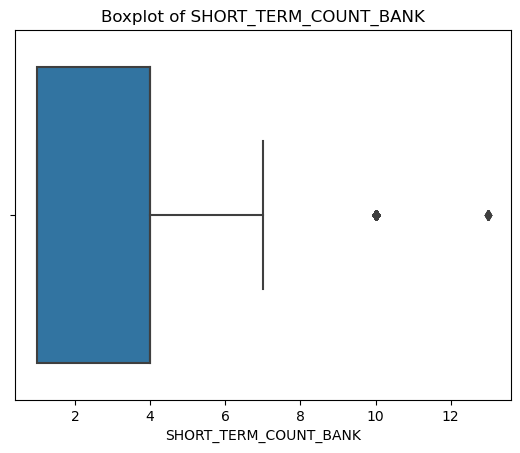

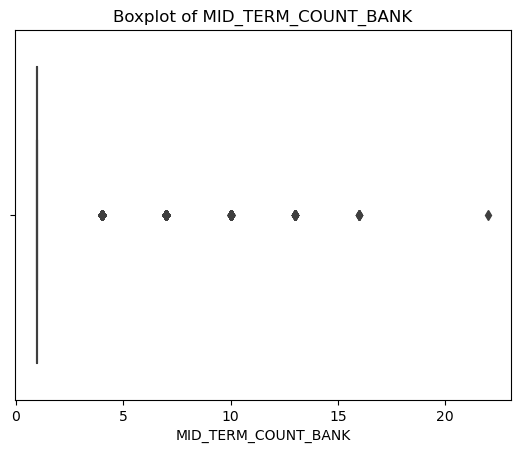

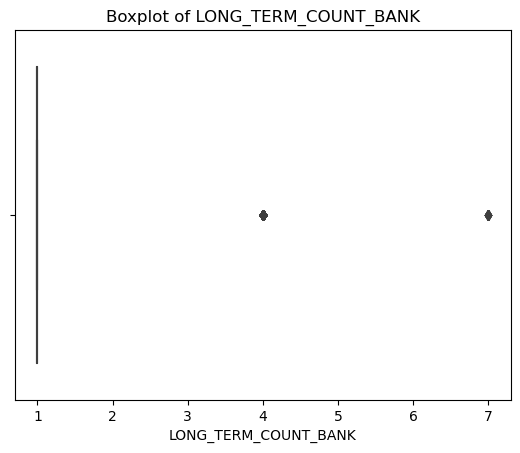

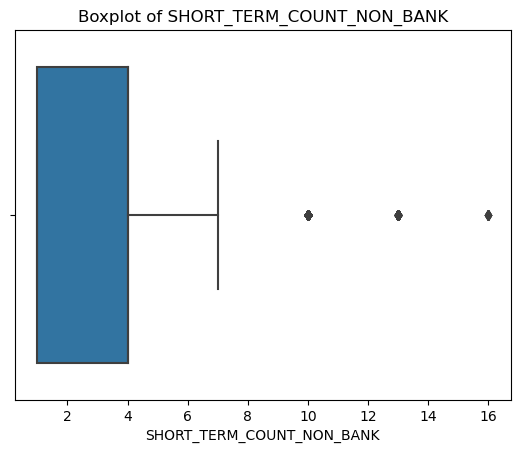

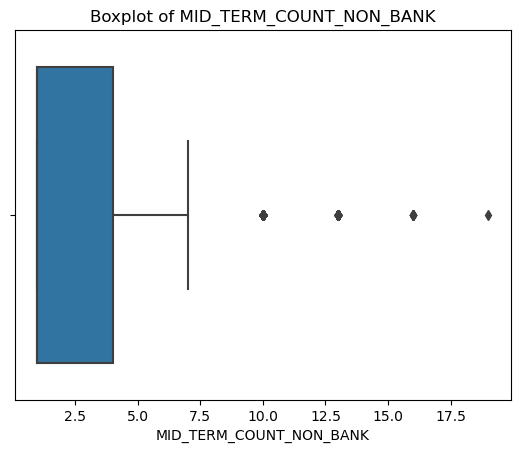

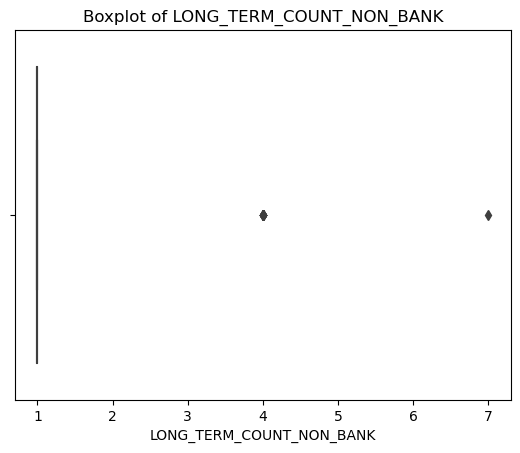

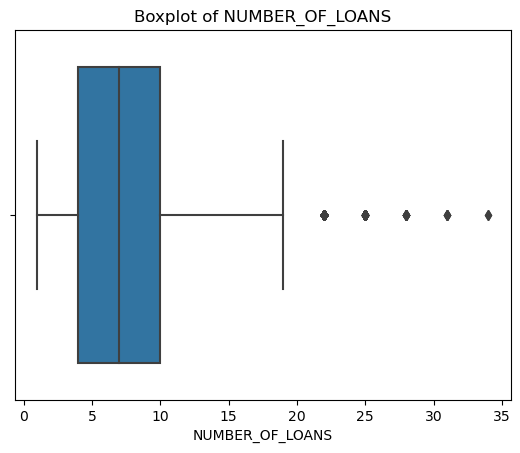

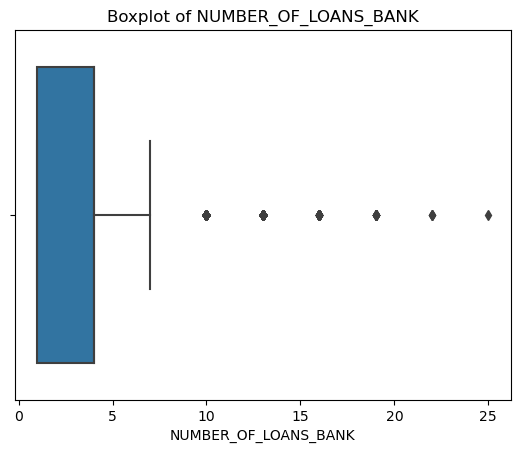

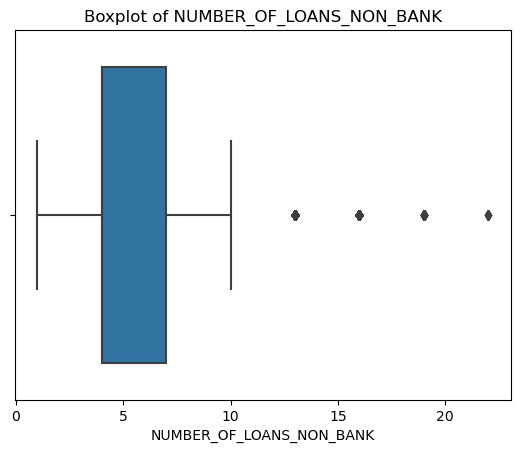

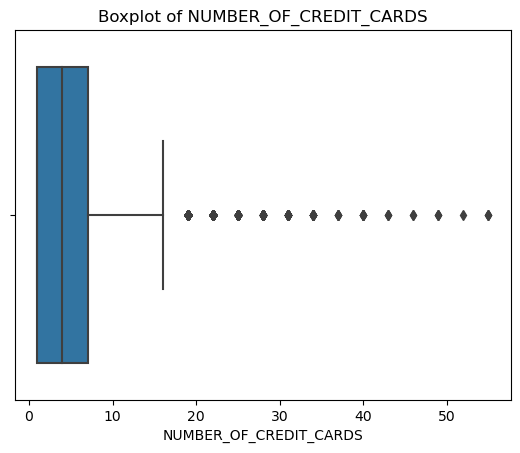

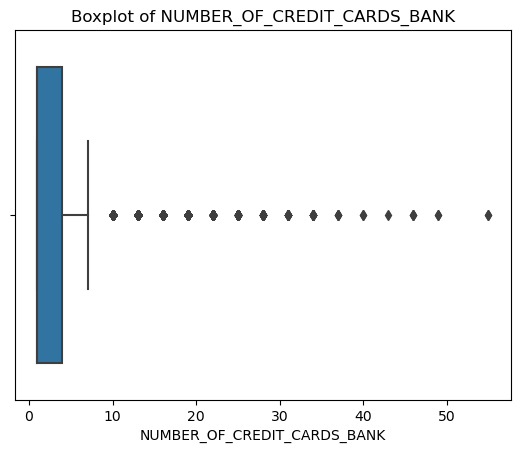

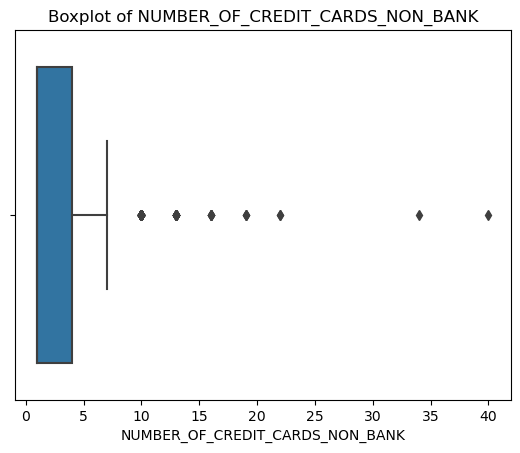

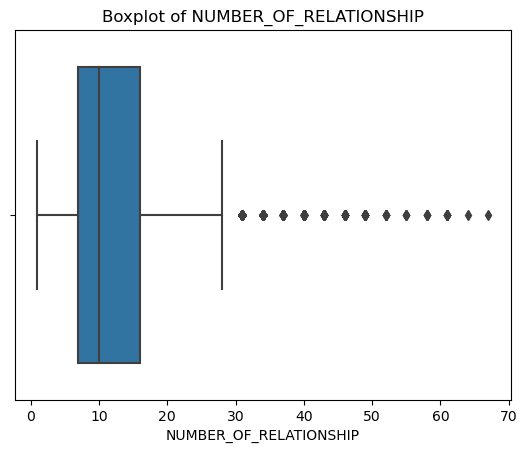

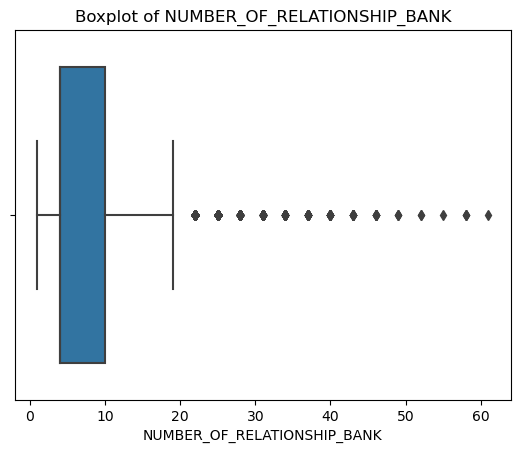

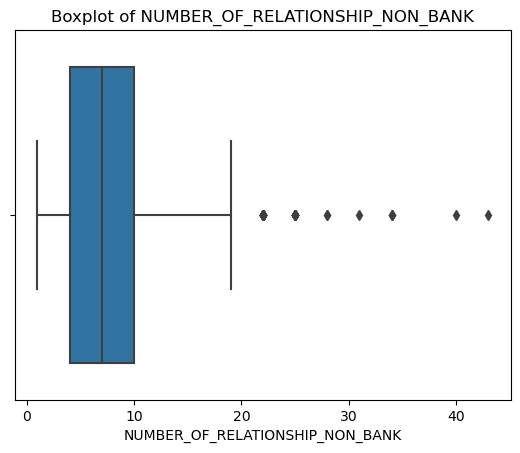

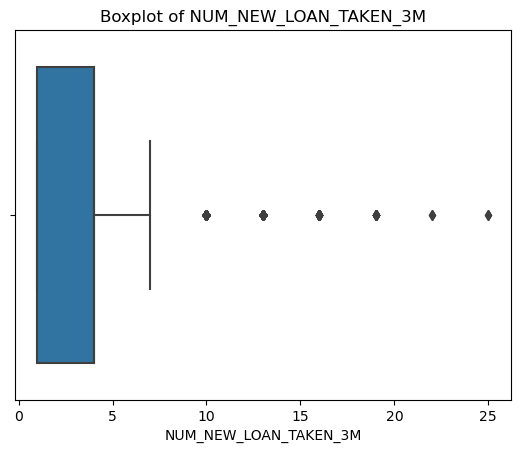

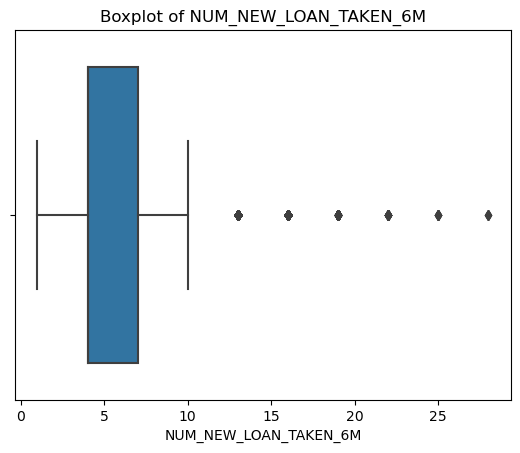

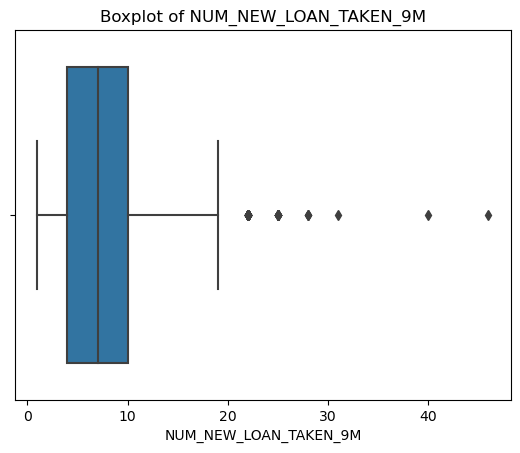

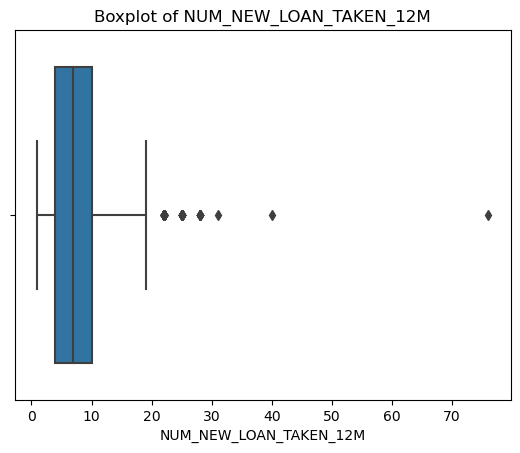

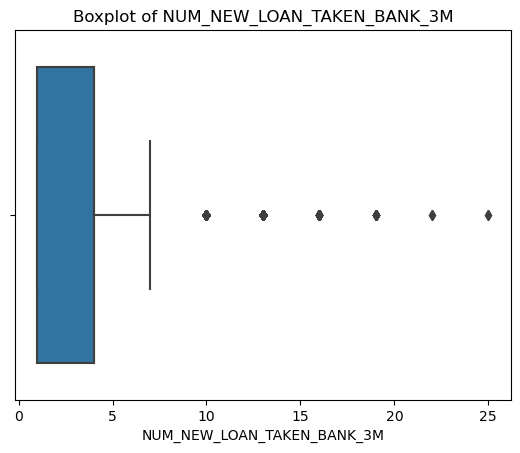

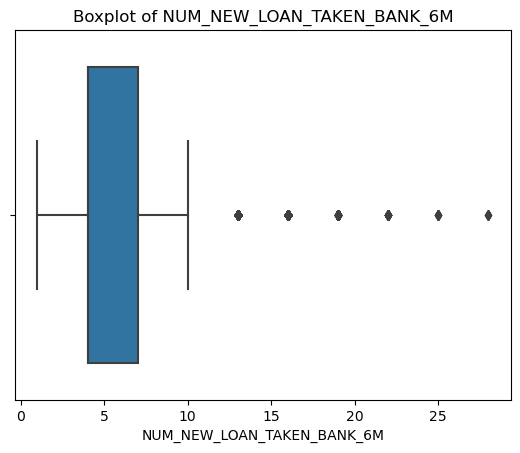

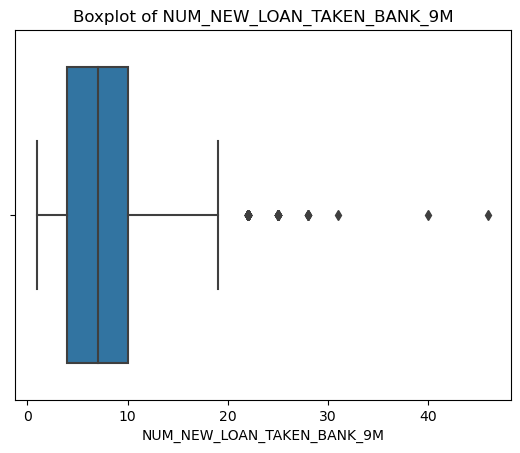

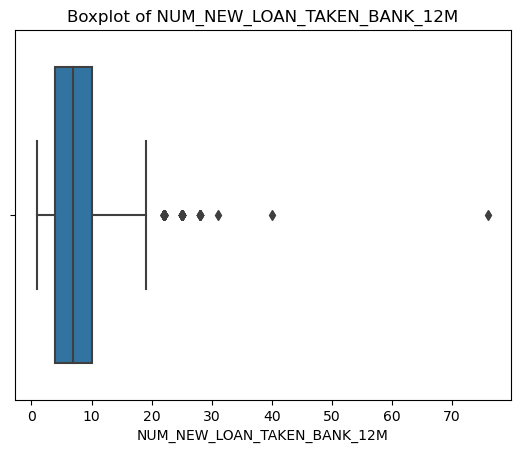

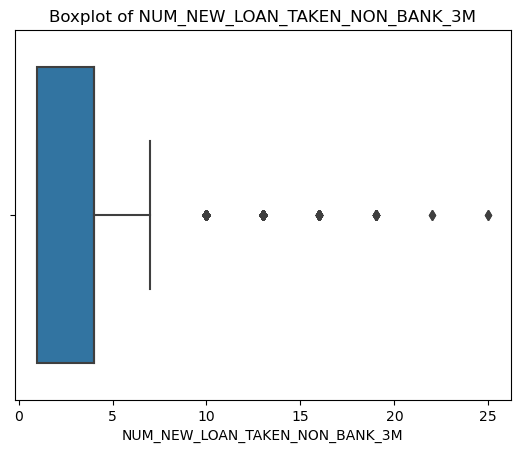

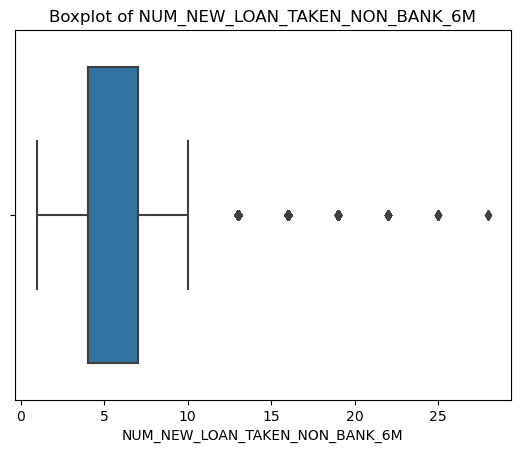

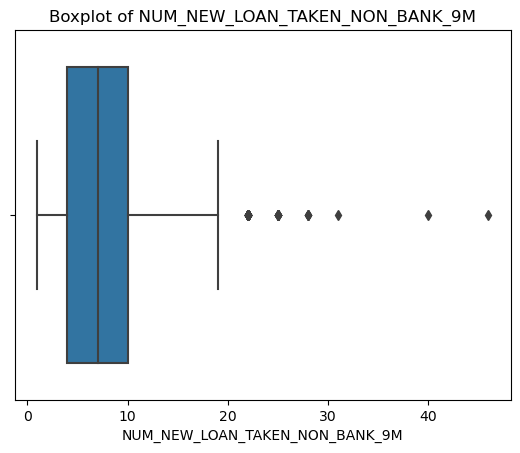

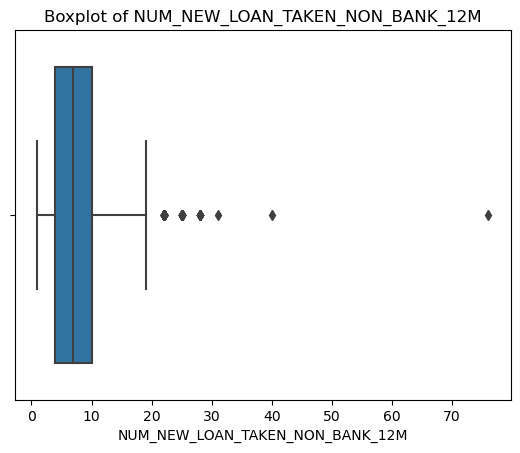

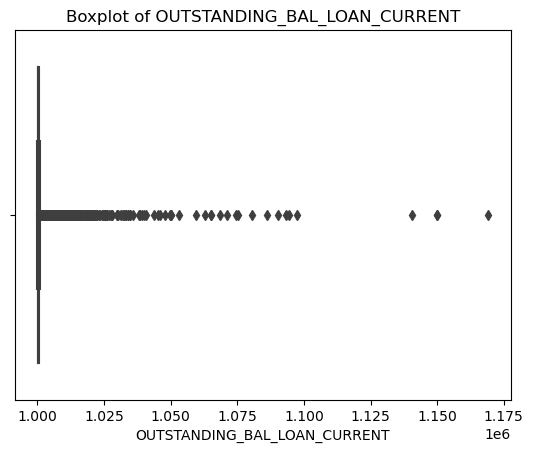

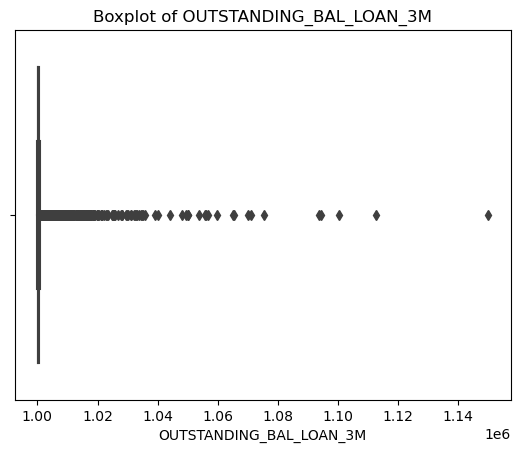

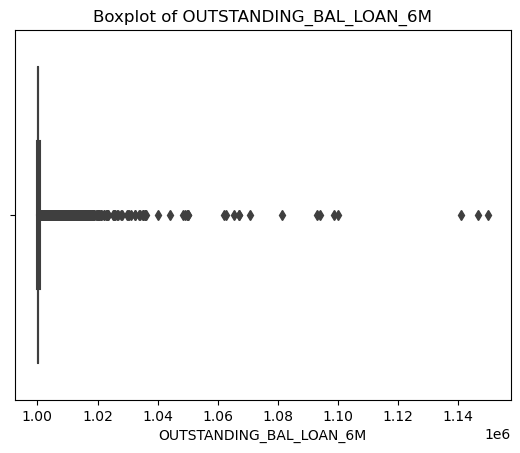

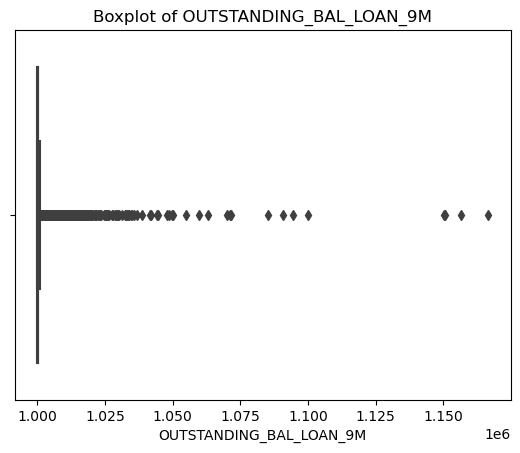

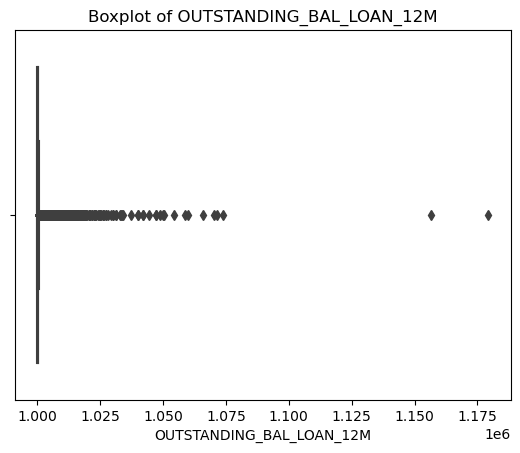

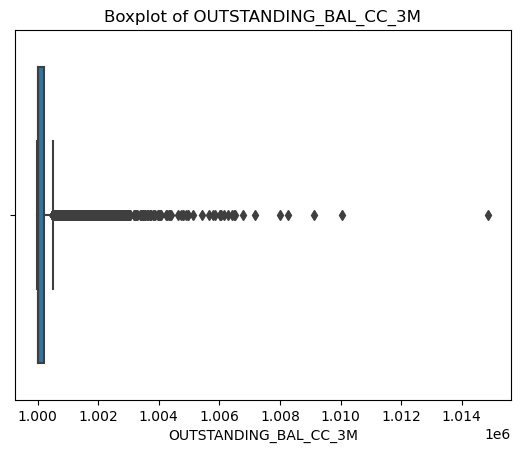

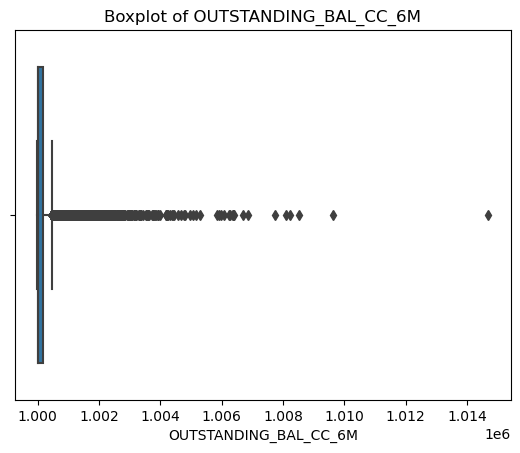

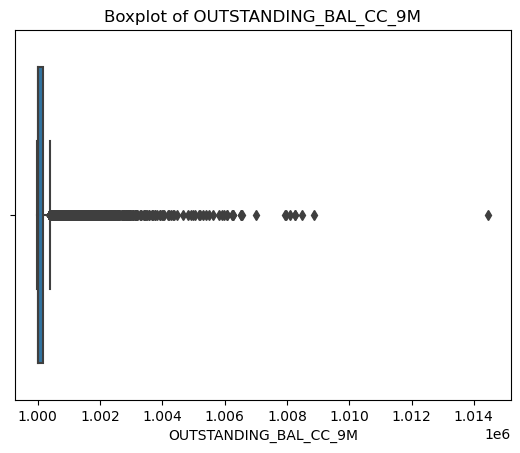

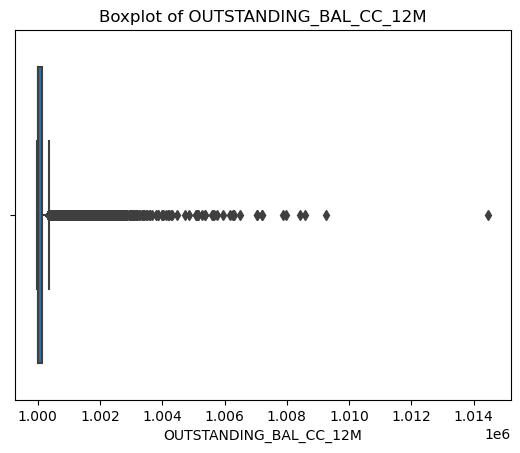

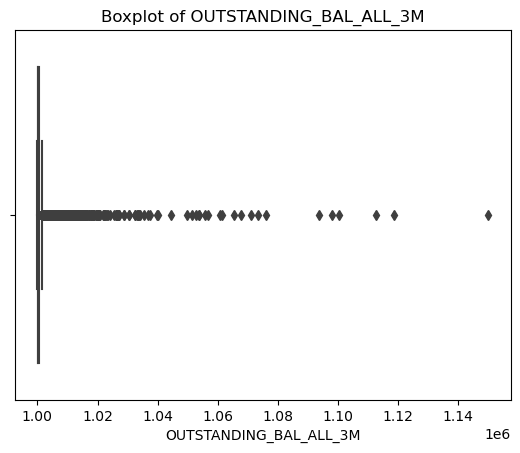

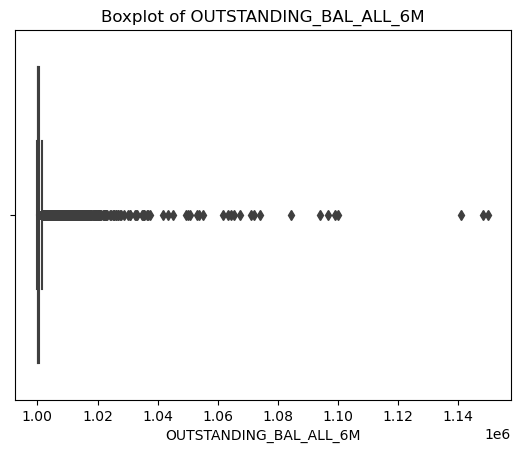

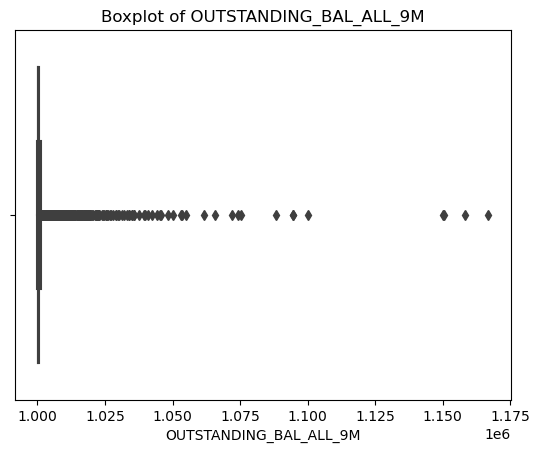

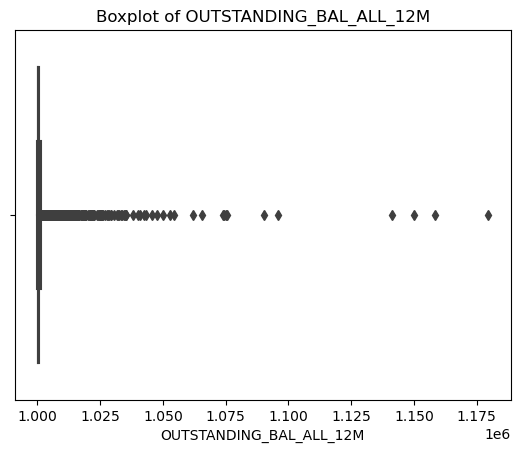

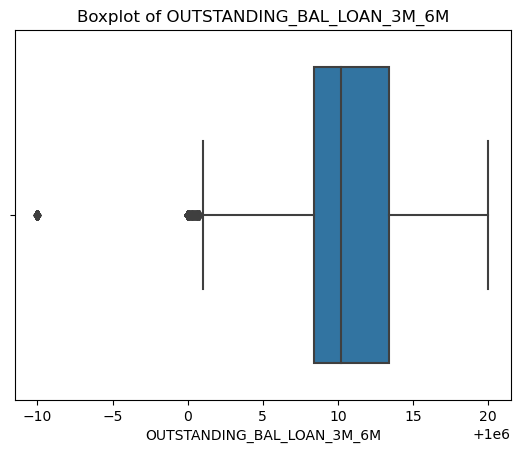

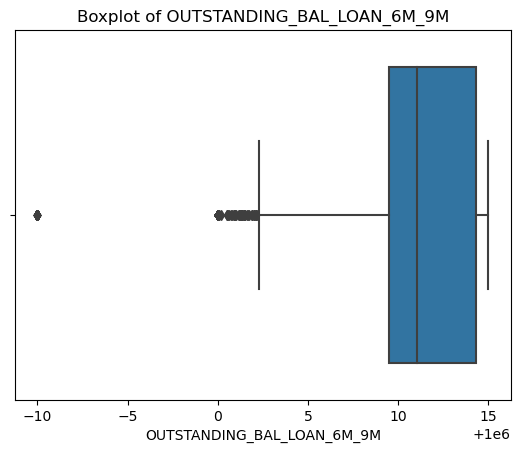

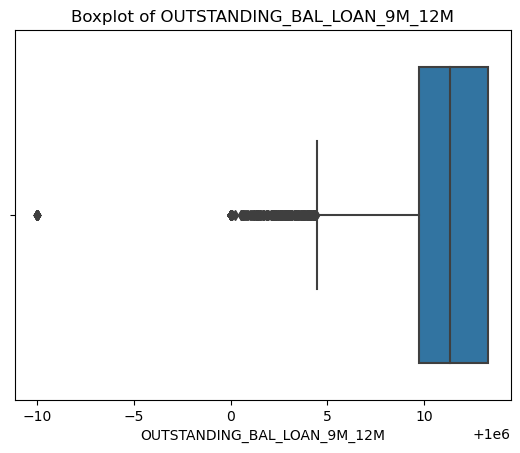

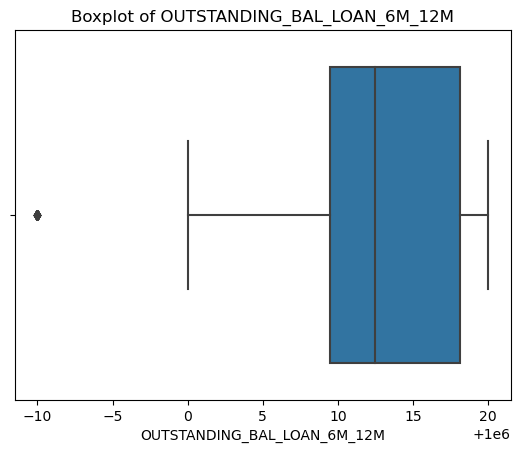

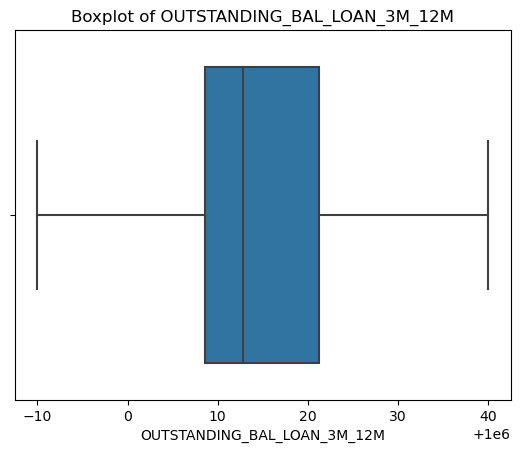

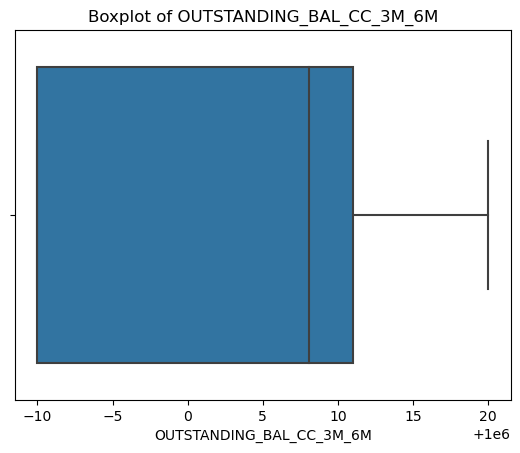

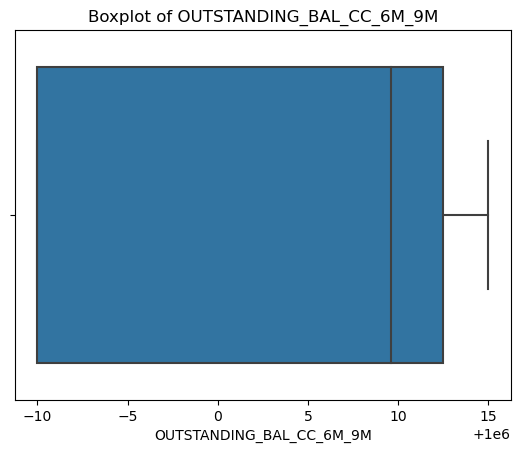

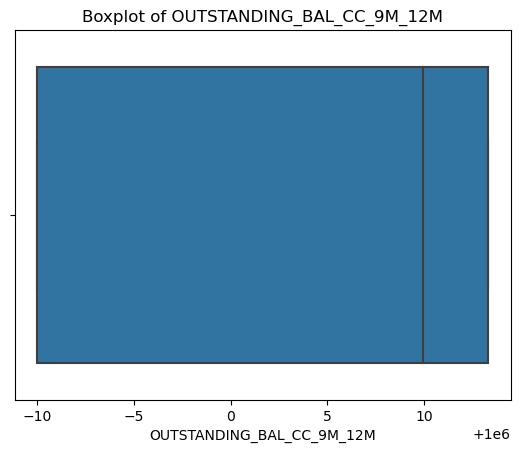

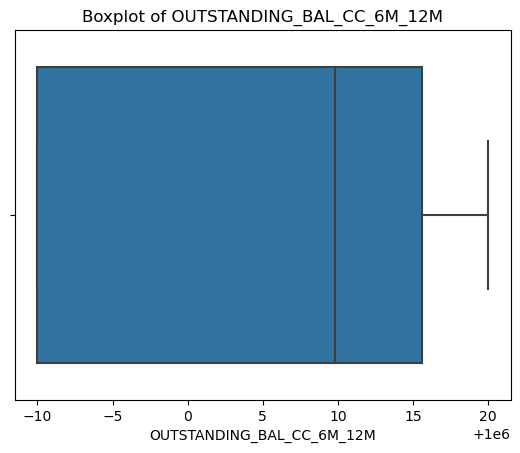

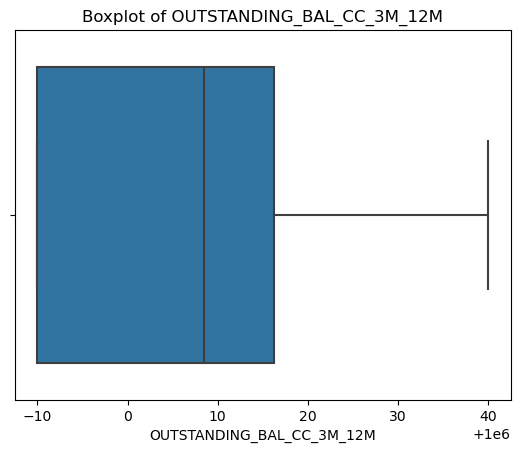

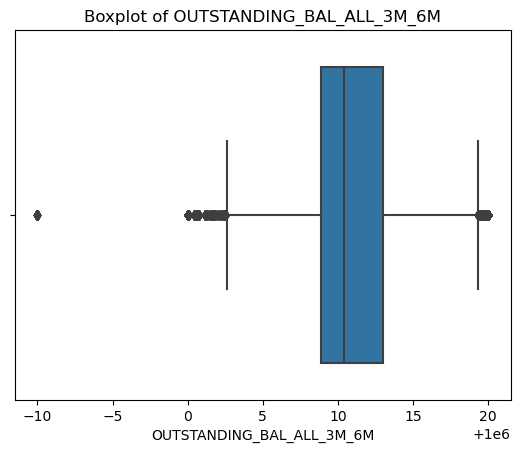

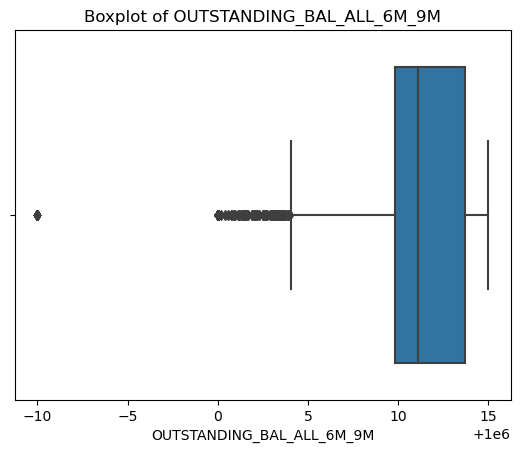

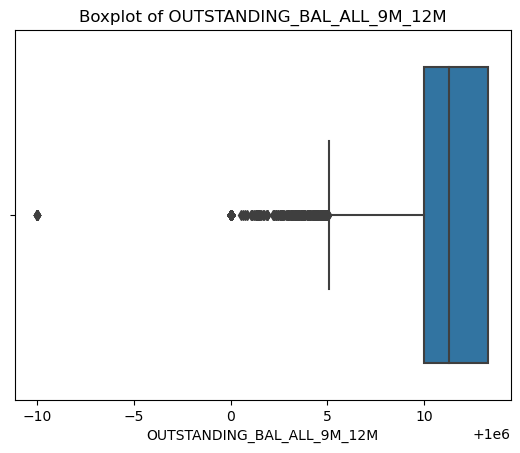

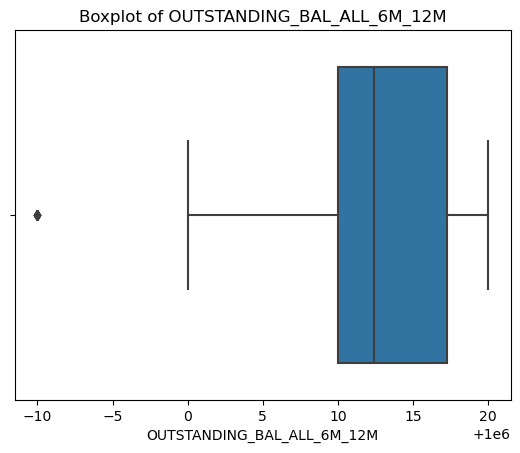

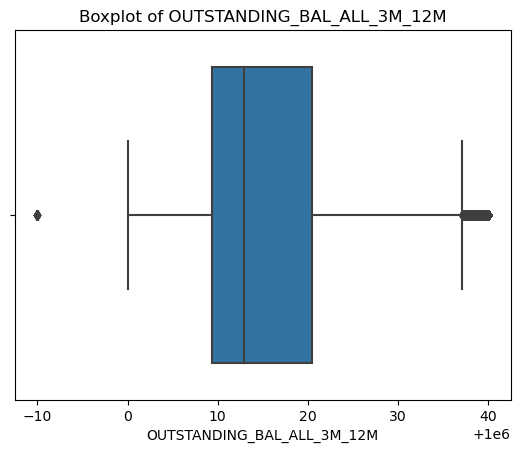

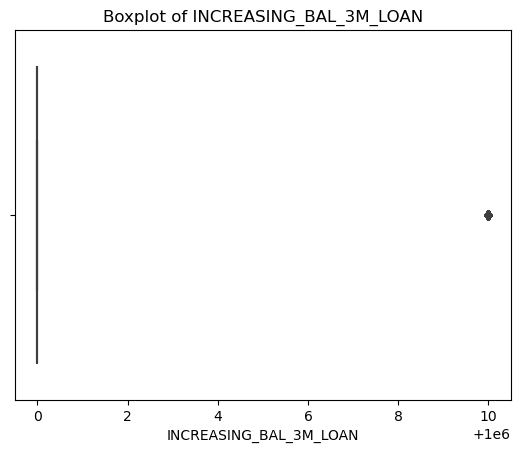

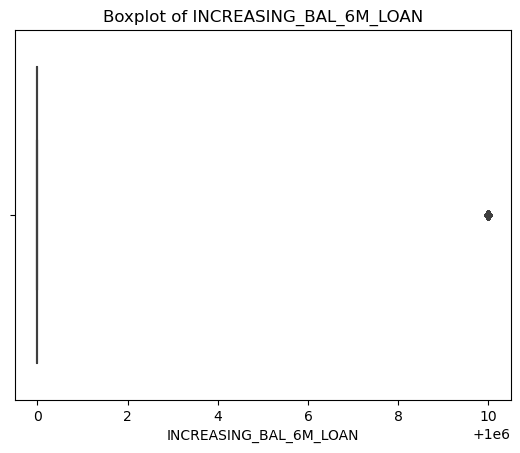

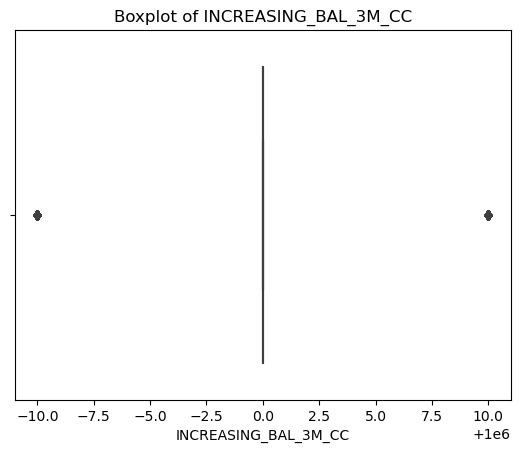

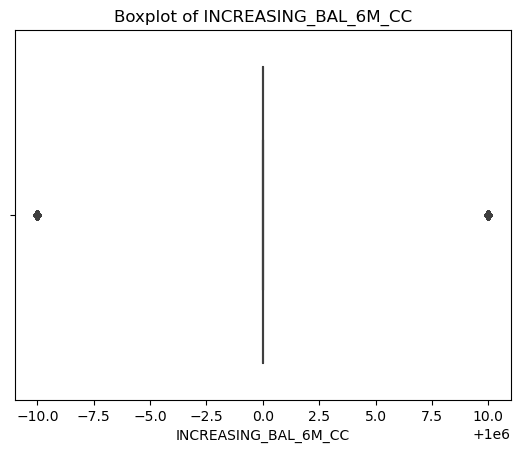

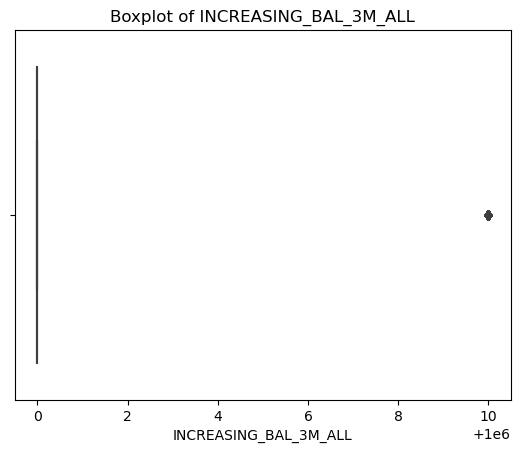

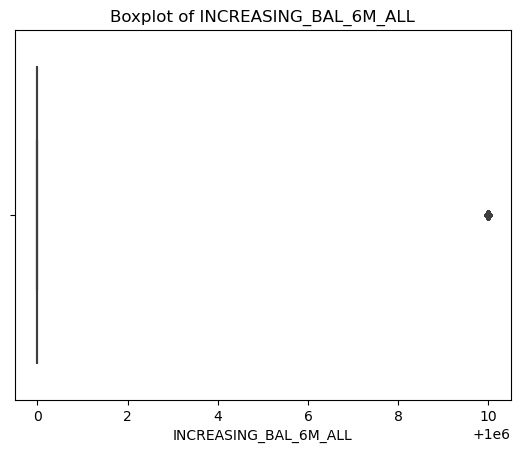

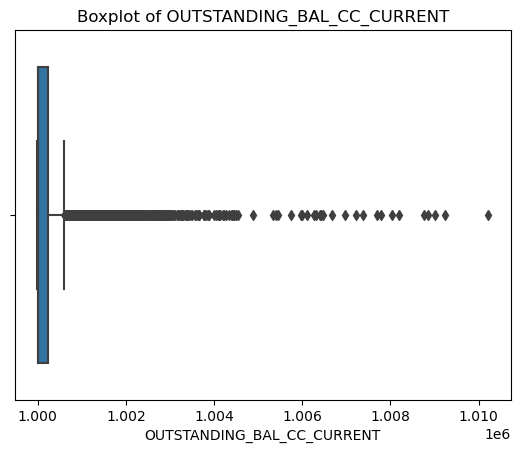

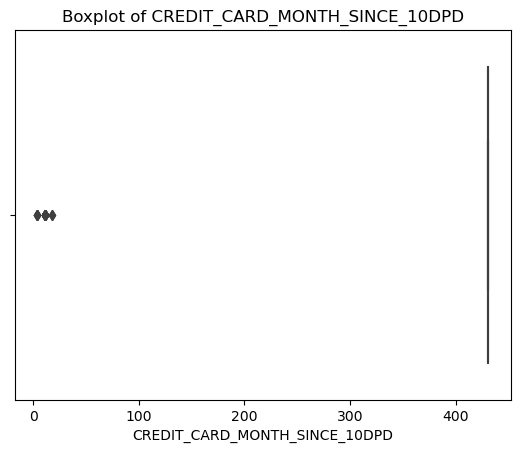

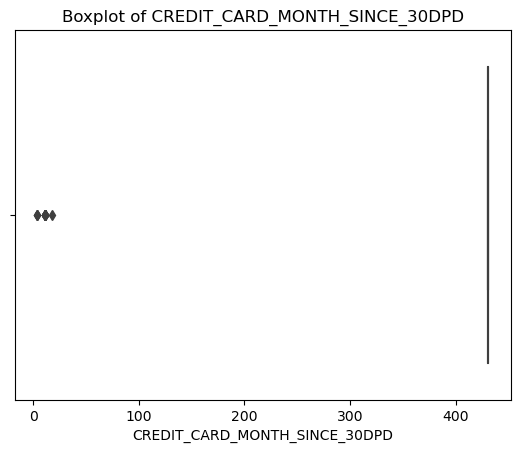

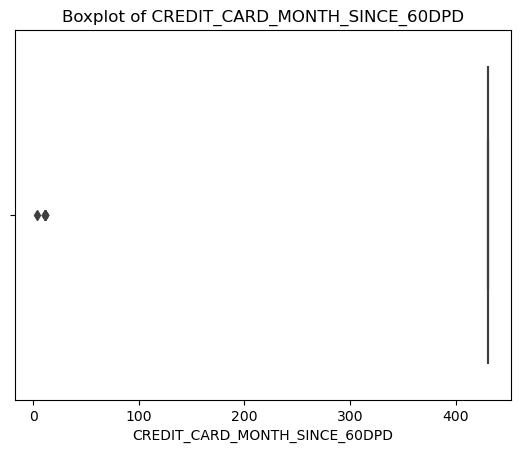

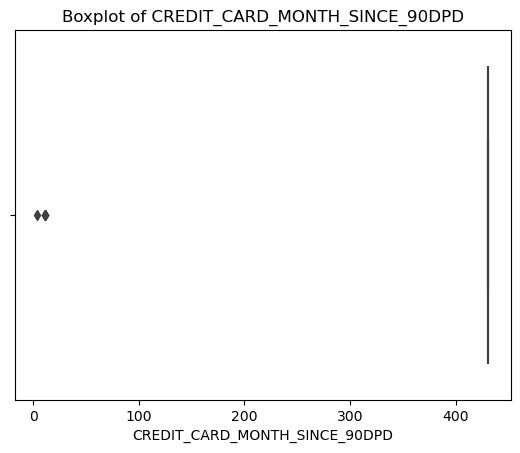

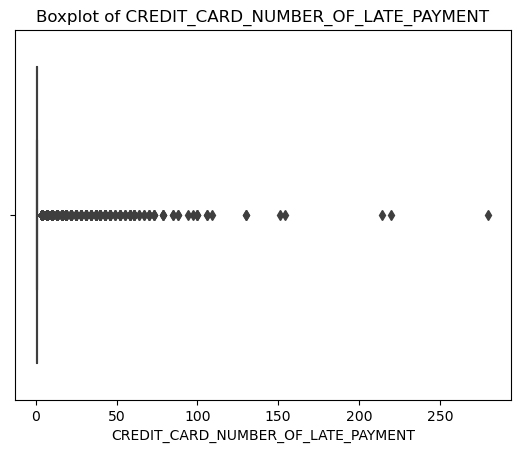

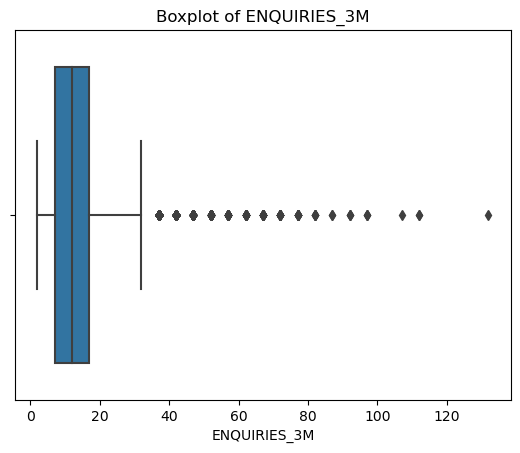

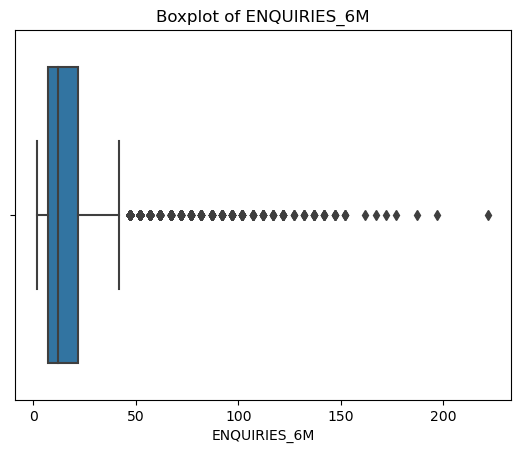

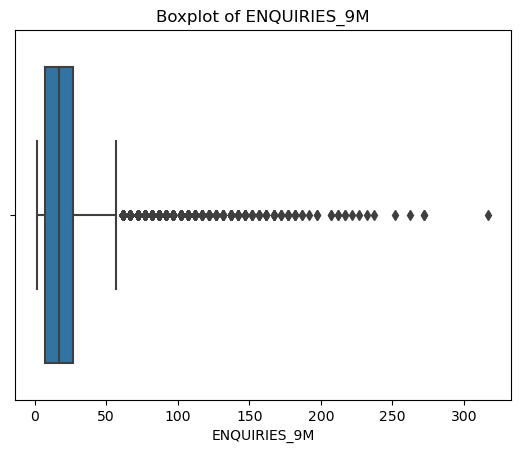

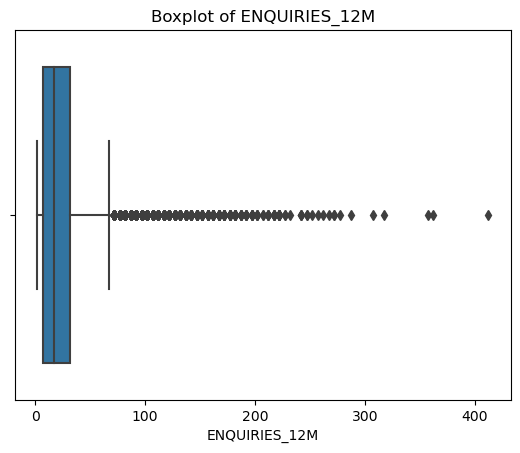

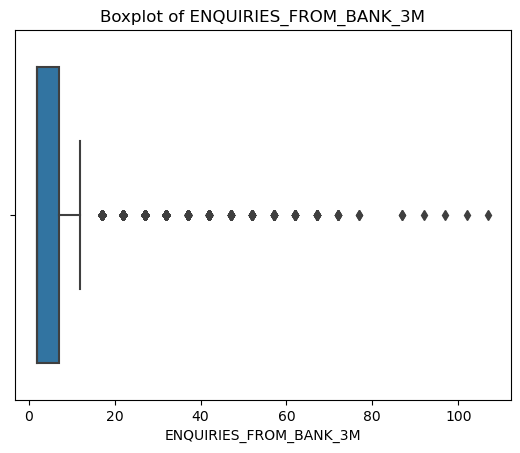

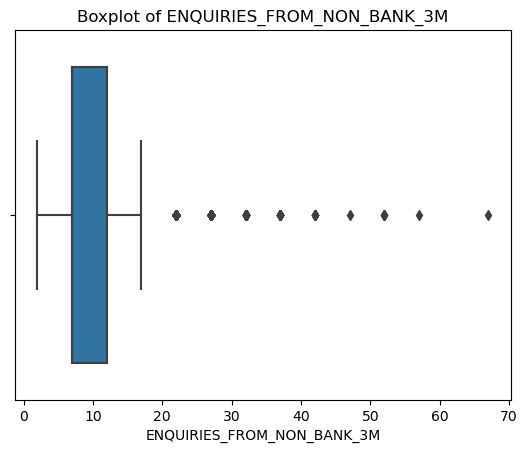

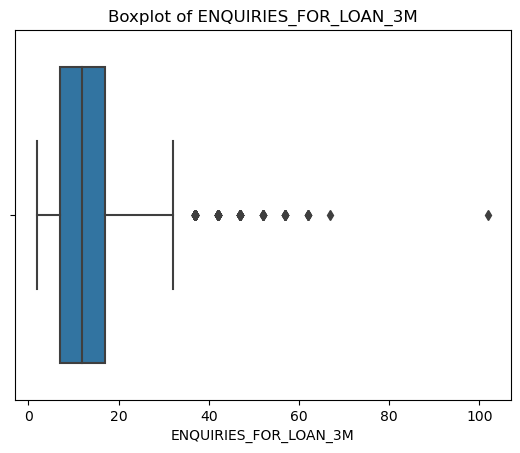

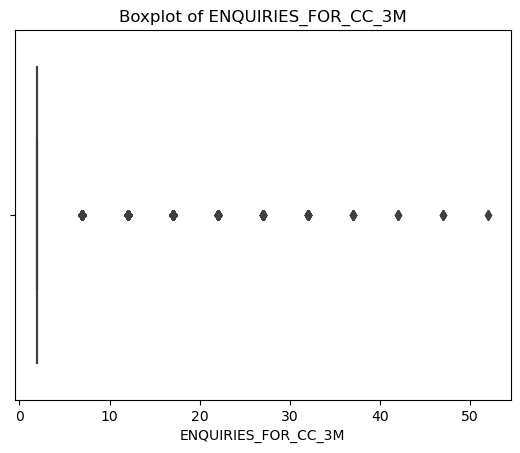

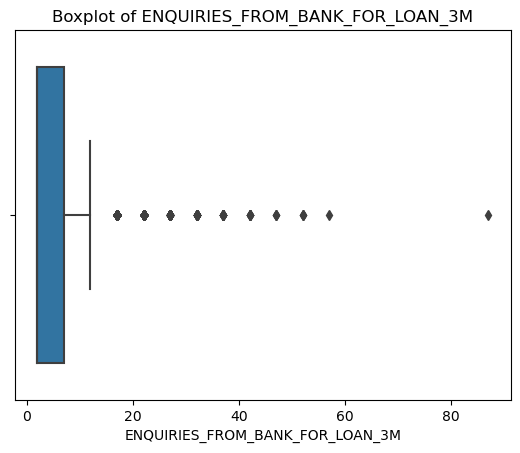

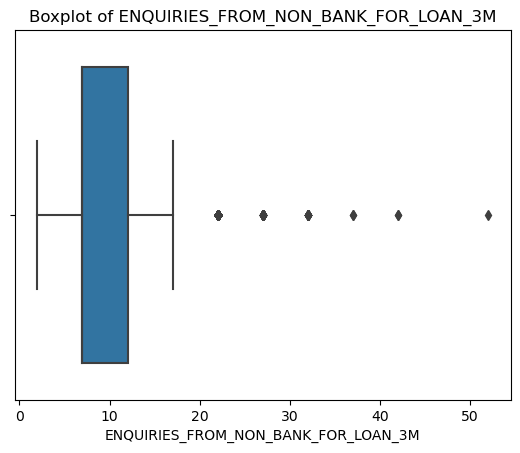

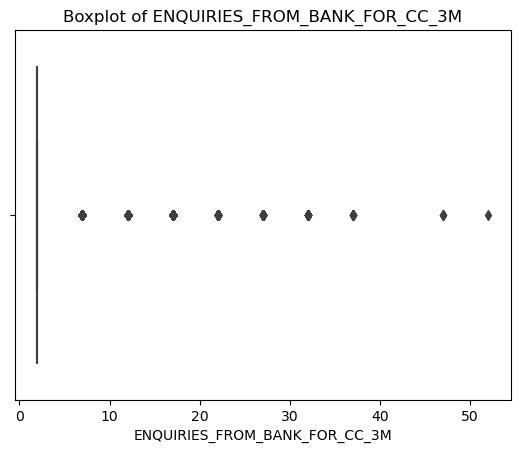

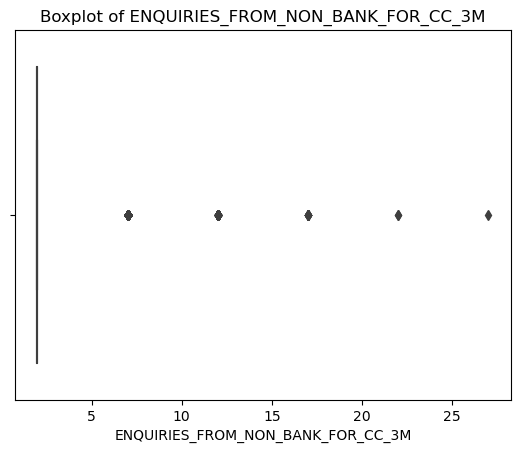

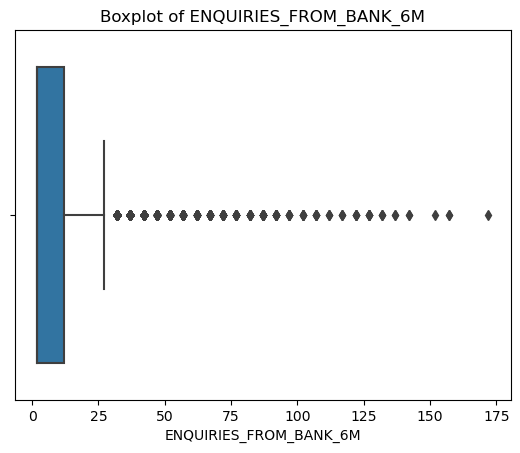

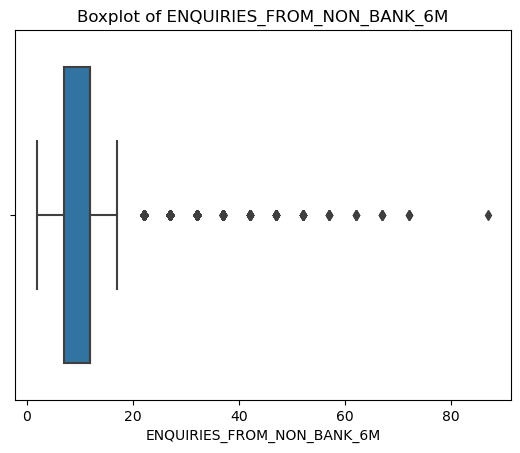

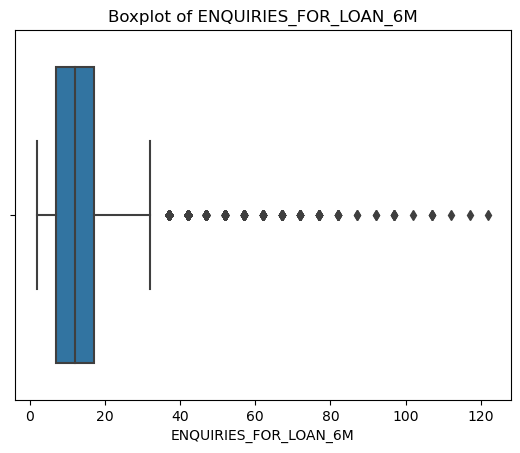

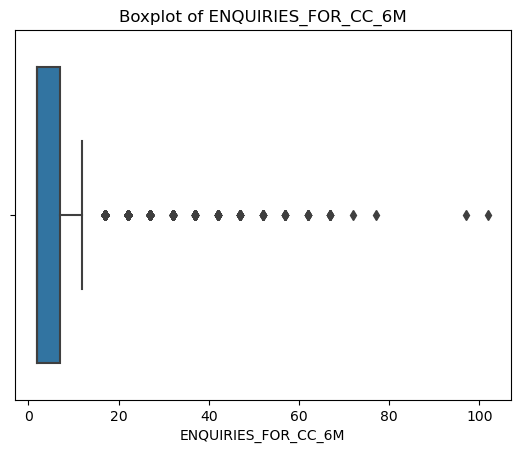

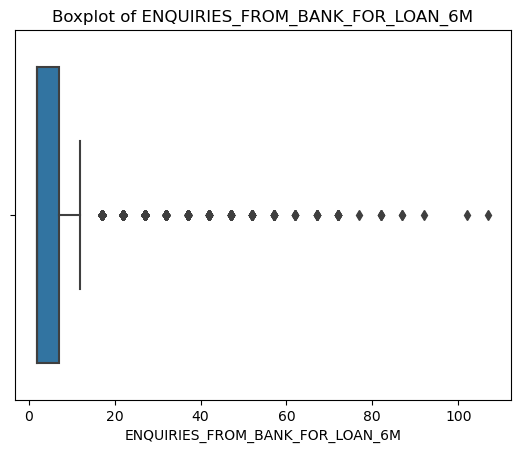

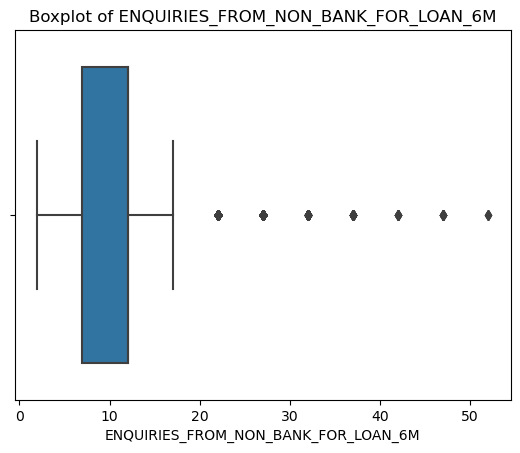

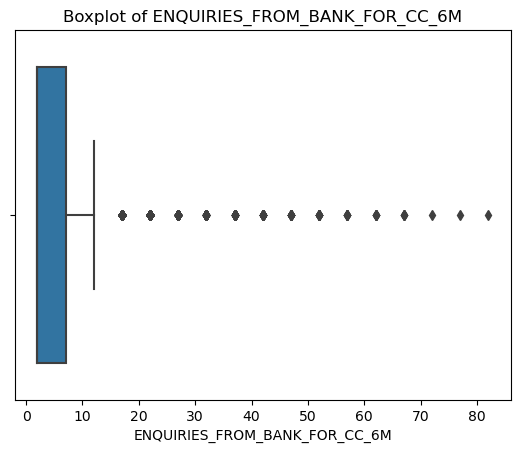

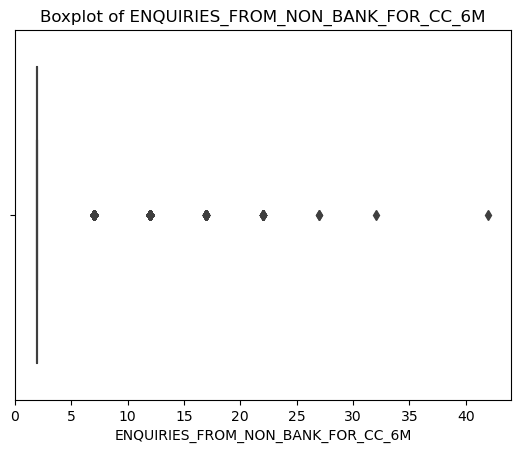

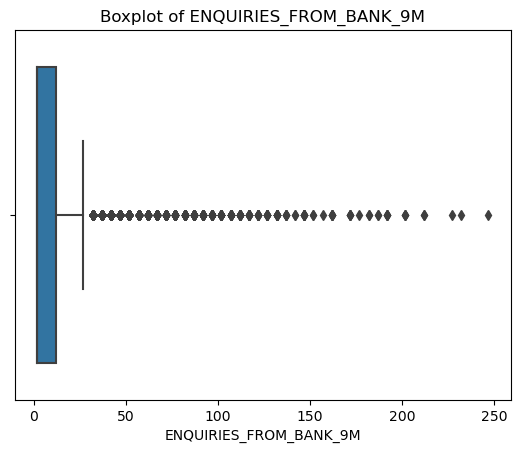

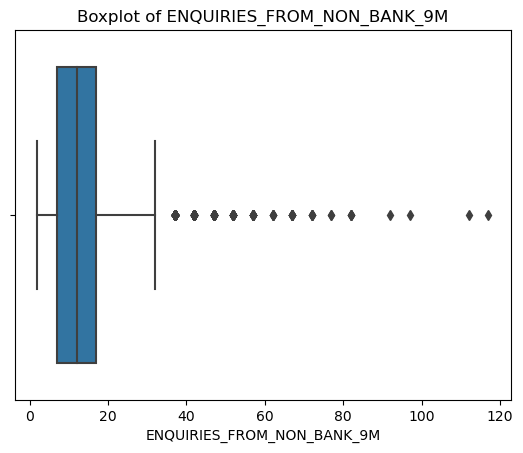

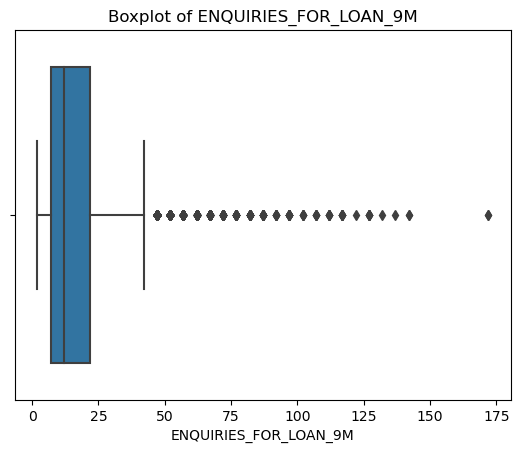

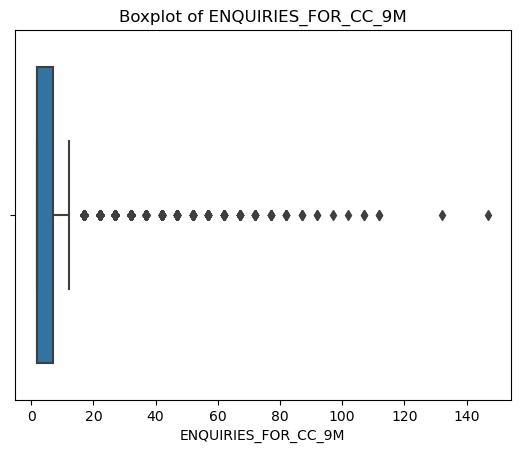

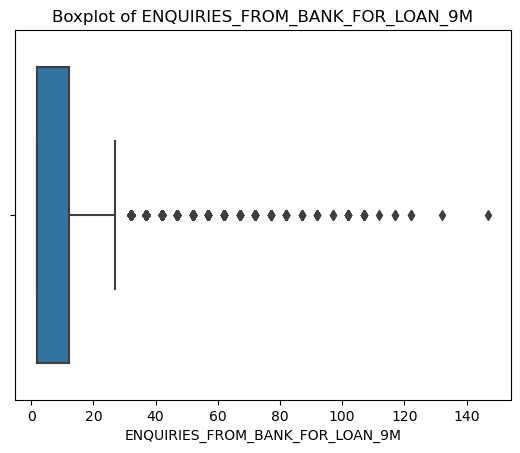

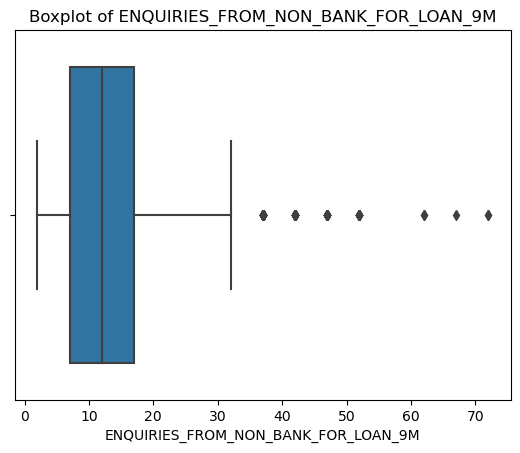

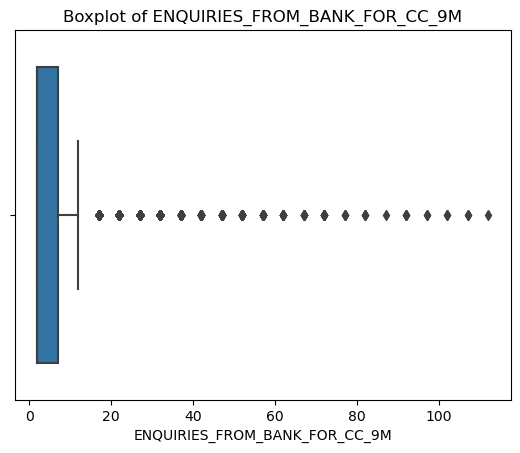

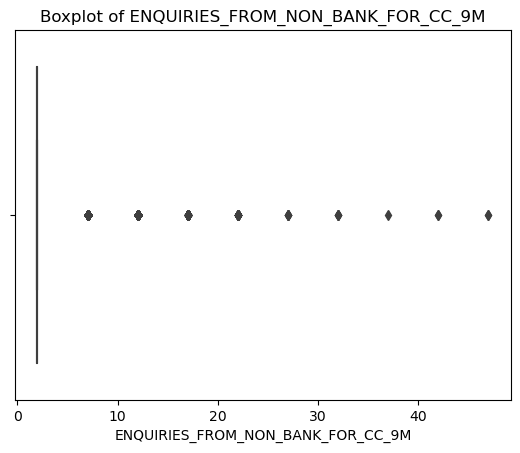

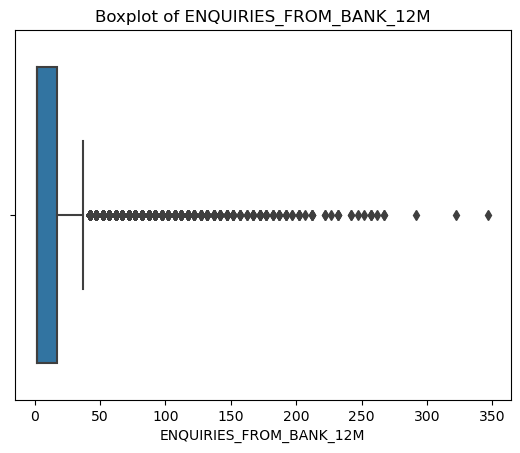

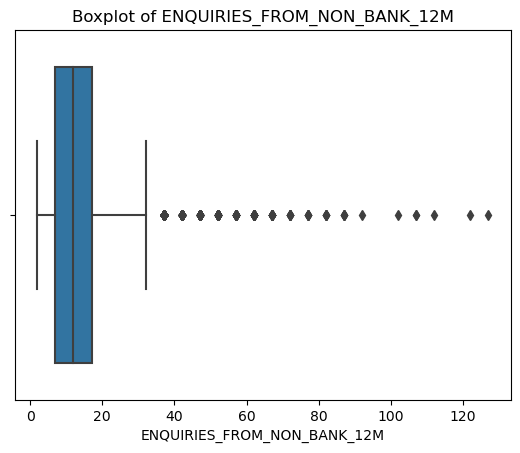

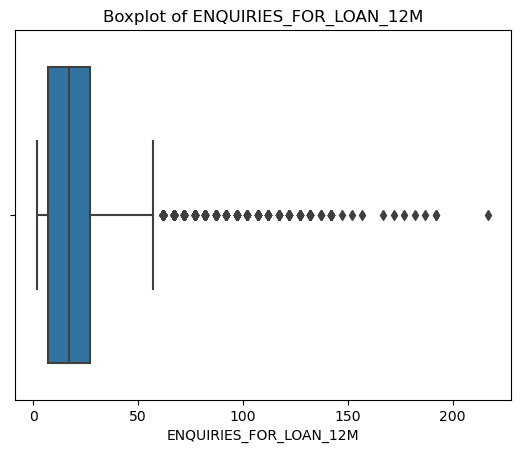

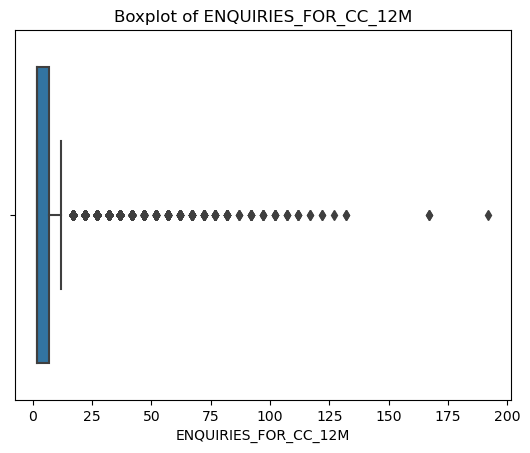

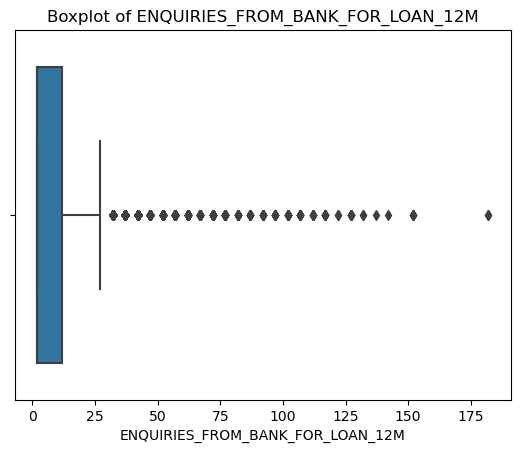

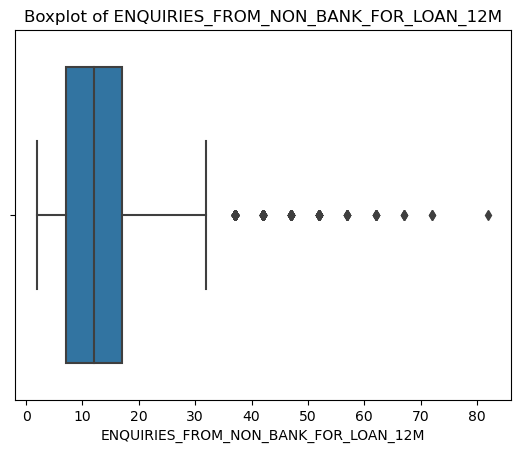

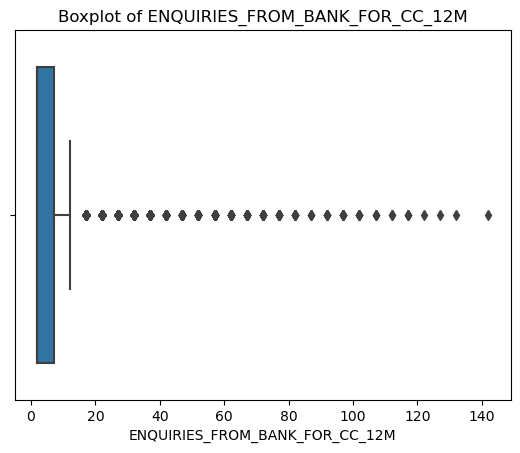

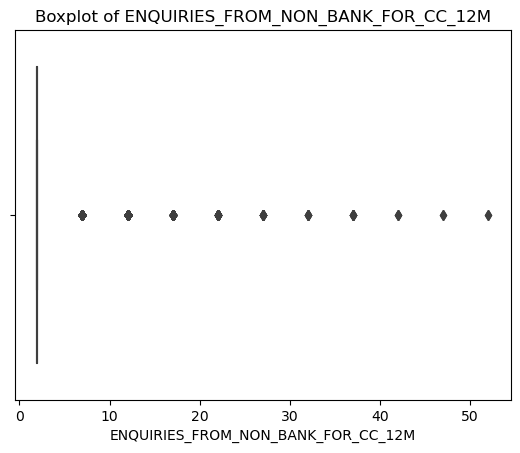

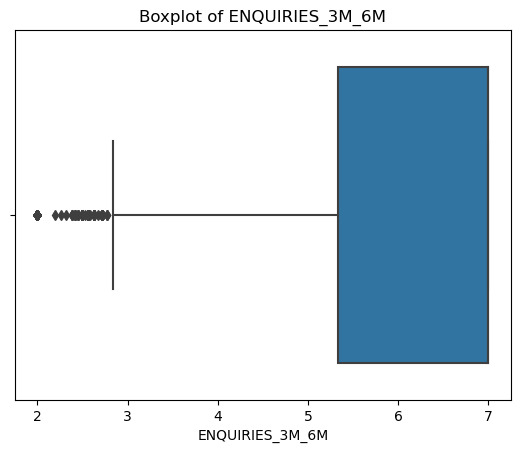

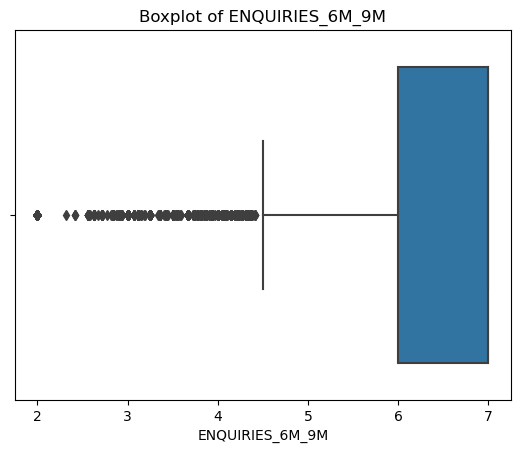

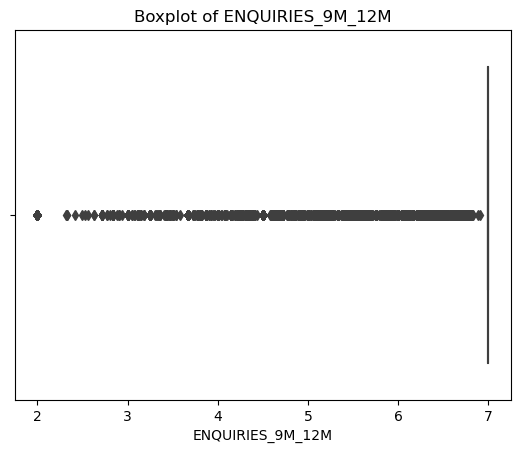

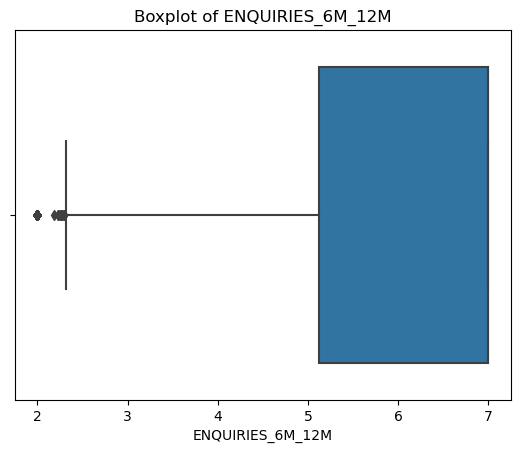

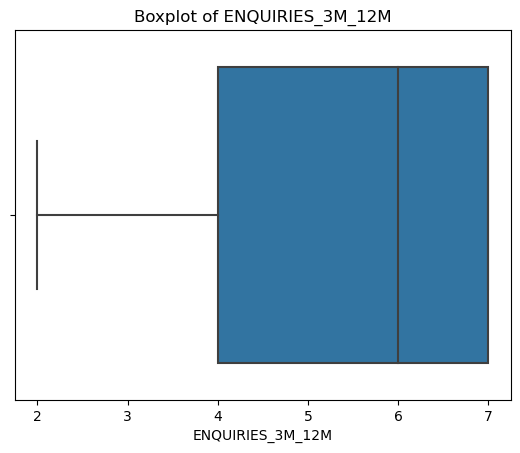

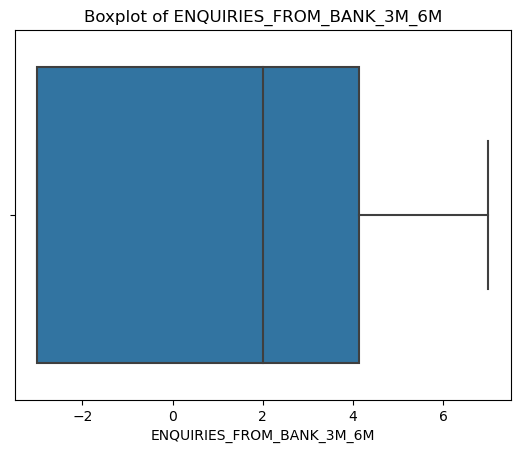

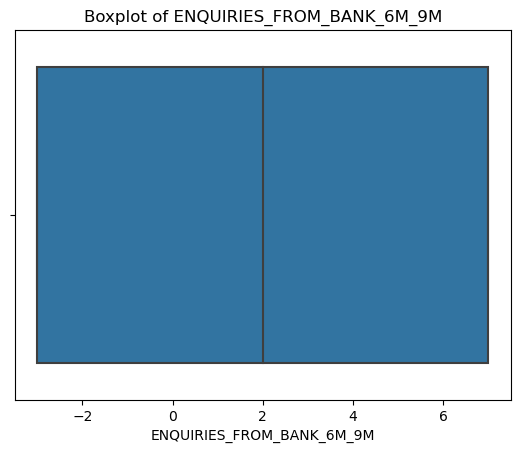

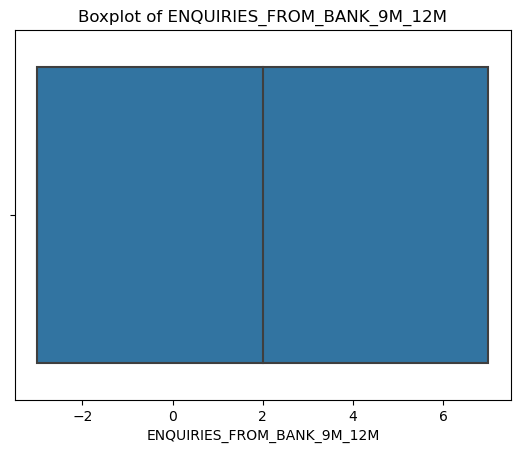

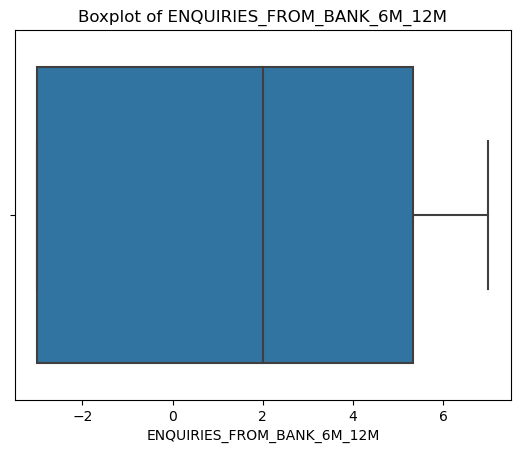

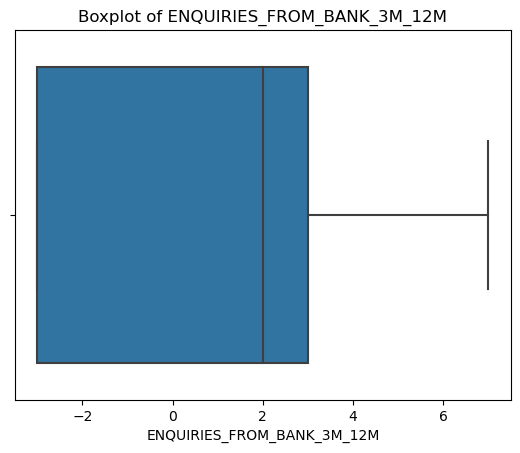

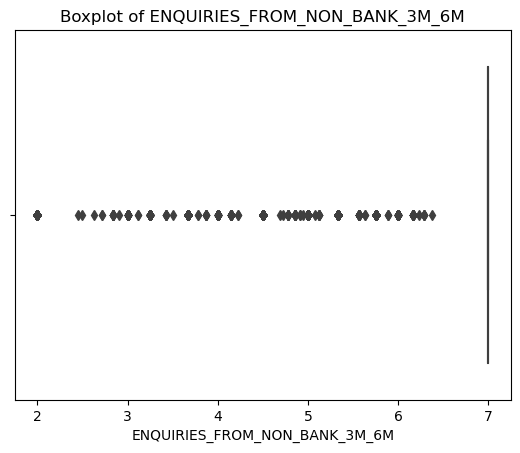

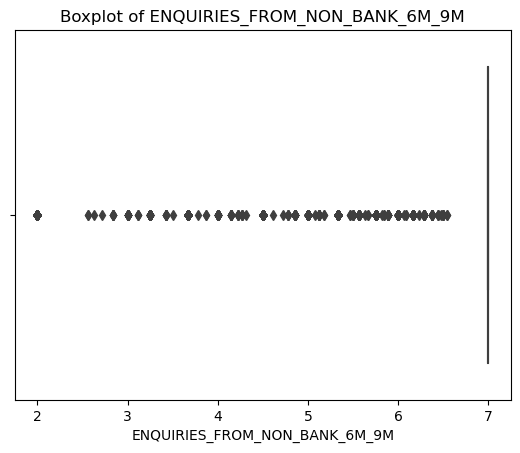

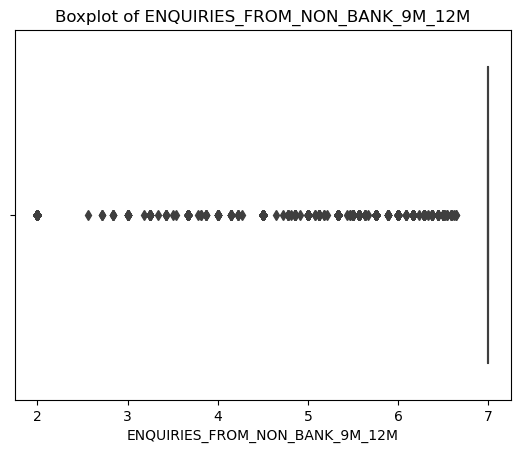

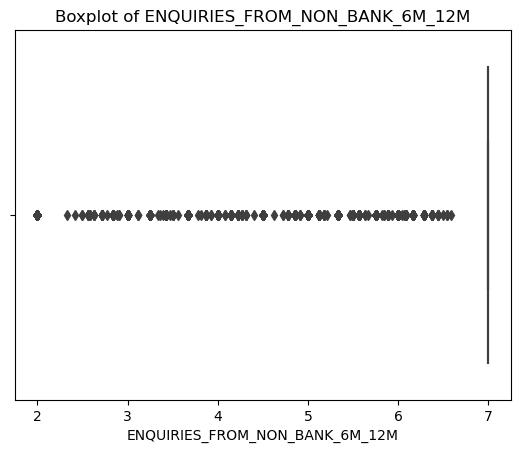

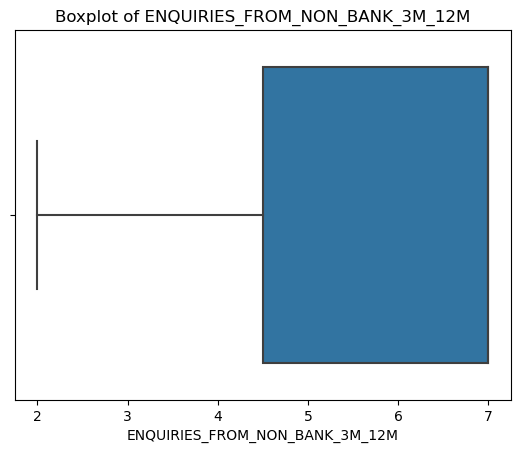

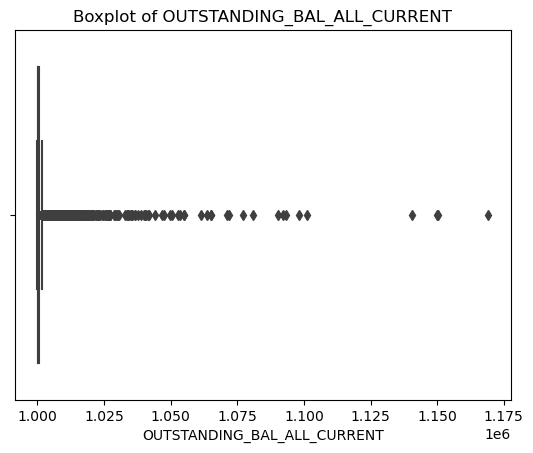

In [10]:
remaining_columns = credit_data.drop(columns=["customer_id", "label"]).columns.tolist()
for c in remaining_columns:
    sns.boxplot(x=c, data=credit_data)
    plt.title(f"Boxplot of {c}")
    plt.show()

In [11]:
remaining_columns

['SHORT_TERM_COUNT',
 'MID_TERM_COUNT',
 'LONG_TERM_COUNT',
 'SHORT_TERM_COUNT_BANK',
 'MID_TERM_COUNT_BANK',
 'LONG_TERM_COUNT_BANK',
 'SHORT_TERM_COUNT_NON_BANK',
 'MID_TERM_COUNT_NON_BANK',
 'LONG_TERM_COUNT_NON_BANK',
 'NUMBER_OF_LOANS',
 'NUMBER_OF_LOANS_BANK',
 'NUMBER_OF_LOANS_NON_BANK',
 'NUMBER_OF_CREDIT_CARDS',
 'NUMBER_OF_CREDIT_CARDS_BANK',
 'NUMBER_OF_CREDIT_CARDS_NON_BANK',
 'NUMBER_OF_RELATIONSHIP',
 'NUMBER_OF_RELATIONSHIP_BANK',
 'NUMBER_OF_RELATIONSHIP_NON_BANK',
 'NUM_NEW_LOAN_TAKEN_3M',
 'NUM_NEW_LOAN_TAKEN_6M',
 'NUM_NEW_LOAN_TAKEN_9M',
 'NUM_NEW_LOAN_TAKEN_12M',
 'NUM_NEW_LOAN_TAKEN_BANK_3M',
 'NUM_NEW_LOAN_TAKEN_BANK_6M',
 'NUM_NEW_LOAN_TAKEN_BANK_9M',
 'NUM_NEW_LOAN_TAKEN_BANK_12M',
 'NUM_NEW_LOAN_TAKEN_NON_BANK_3M',
 'NUM_NEW_LOAN_TAKEN_NON_BANK_6M',
 'NUM_NEW_LOAN_TAKEN_NON_BANK_9M',
 'NUM_NEW_LOAN_TAKEN_NON_BANK_12M',
 'OUTSTANDING_BAL_LOAN_CURRENT',
 'OUTSTANDING_BAL_LOAN_3M',
 'OUTSTANDING_BAL_LOAN_6M',
 'OUTSTANDING_BAL_LOAN_9M',
 'OUTSTANDING_BAL_LOAN_12M

## Sử dụng một số những mối quan hệ logic của các cột để điền vào các ô có giá trị null

Cột `SHORT_TERM_COUNT` = `SHORT_TERM_COUNT_BANK` + `SHORT_TERM_COUNT_NON_BANK` - 1

In [12]:
credit_data['SHORT_TERM_COUNT'] = credit_data['SHORT_TERM_COUNT'].fillna(credit_data['SHORT_TERM_COUNT_BANK'] + credit_data['SHORT_TERM_COUNT_NON_BANK']-1)
credit_data['SHORT_TERM_COUNT_BANK'] = credit_data['SHORT_TERM_COUNT_BANK'].fillna(credit_data['SHORT_TERM_COUNT'] - credit_data['SHORT_TERM_COUNT_NON_BANK'] +1)
credit_data['SHORT_TERM_COUNT_NON_BANK'] = credit_data['SHORT_TERM_COUNT_NON_BANK'].fillna(credit_data['SHORT_TERM_COUNT'] - credit_data['SHORT_TERM_COUNT_BANK'] +1)

Cột `MID_TERM_COUNT` = `MID_TERM_COUNT_BANK` + `MID_TERM_COUNT_NON_BANK` - 1

In [13]:
credit_data['MID_TERM_COUNT'] = credit_data['MID_TERM_COUNT'].fillna(credit_data['MID_TERM_COUNT_BANK'] + credit_data['MID_TERM_COUNT_NON_BANK']-1)
credit_data['MID_TERM_COUNT_BANK'] = credit_data['MID_TERM_COUNT_BANK'].fillna(credit_data['MID_TERM_COUNT'] - credit_data['MID_TERM_COUNT_NON_BANK'] +1)
credit_data['MID_TERM_COUNT_NON_BANK'] = credit_data['MID_TERM_COUNT_NON_BANK'].fillna(credit_data['MID_TERM_COUNT'] - credit_data['MID_TERM_COUNT_BANK'] +1)

Cột `LONG_TERM_COUNT` = `LONG_TERM_COUNT_BANK` + `LONG_TERM_COUNT_NON_BANK` - 1

In [14]:
credit_data['LONG_TERM_COUNT'] = credit_data['LONG_TERM_COUNT'].fillna(credit_data['LONG_TERM_COUNT_BANK'] + credit_data['LONG_TERM_COUNT_NON_BANK']-1)
credit_data['LONG_TERM_COUNT_BANK'] = credit_data['LONG_TERM_COUNT_BANK'].fillna(credit_data['LONG_TERM_COUNT'] - credit_data['LONG_TERM_COUNT_NON_BANK'] +1)
credit_data['LONG_TERM_COUNT_NON_BANK'] = credit_data['LONG_TERM_COUNT_NON_BANK'].fillna(credit_data['LONG_TERM_COUNT'] - credit_data['LONG_TERM_COUNT_BANK'] +1)

Cột `NUMBER_OF_LOANS` = `NUMBER_OF_LOANS_BANK` + `NUMBER_OF_LOANS_NON_BANK` -1

In [15]:
credit_data['NUMBER_OF_LOANS'] = credit_data['NUMBER_OF_LOANS'].fillna(credit_data['NUMBER_OF_LOANS_BANK'] + credit_data['NUMBER_OF_LOANS_NON_BANK']-1)
credit_data['NUMBER_OF_LOANS_BANK'] = credit_data['NUMBER_OF_LOANS_BANK'].fillna(credit_data['NUMBER_OF_LOANS'] - credit_data['NUMBER_OF_LOANS_NON_BANK'] +1)
credit_data['NUMBER_OF_LOANS_NON_BANK'] = credit_data['NUMBER_OF_LOANS_NON_BANK'].fillna(credit_data['NUMBER_OF_LOANS'] - credit_data['NUMBER_OF_LOANS_BANK'] +1)

Cột `NUMBER_OF_RELATIONSHIP` = `NUMBER_OF_RELATIONSHIP_BANK` + `NUMBER_OF_RELATIONSHIP_NON_BANK` -1

In [16]:
credit_data['NUMBER_OF_RELATIONSHIP'] = credit_data['NUMBER_OF_RELATIONSHIP'].fillna(credit_data['NUMBER_OF_RELATIONSHIP_BANK'] + credit_data['NUMBER_OF_RELATIONSHIP_NON_BANK']-1)
credit_data['NUMBER_OF_RELATIONSHIP_BANK'] = credit_data['NUMBER_OF_RELATIONSHIP_BANK'].fillna(credit_data['NUMBER_OF_RELATIONSHIP'] - credit_data['NUMBER_OF_RELATIONSHIP_NON_BANK'] +1)
credit_data['NUMBER_OF_RELATIONSHIP_NON_BANK'] = credit_data['NUMBER_OF_RELATIONSHIP_NON_BANK'].fillna(credit_data['NUMBER_OF_RELATIONSHIP'] - credit_data['NUMBER_OF_RELATIONSHIP_BANK'] +1)

So sánh độ tương quan giữa các cột `NUM_NEW_LOAN_TAKEN_3M`, `NUM_NEW_LOAN_TAKEN_BANK_3M`, `NUM_NEW_LOAN_TAKEN_NON_BANK_3M`.
Độ tương quan giữa các cột `NUM_NEW_LOAN_TAKEN_6M`, `NUM_NEW_LOAN_TAKEN_BANK_6M`, `NUM_NEW_LOAN_TAKEN_NON_BANK_6M`
Độ tương quan giữa các cột `NUM_NEW_LOAN_TAKEN_9M`, `NUM_NEW_LOAN_TAKEN_BANK_9M`, `NUM_NEW_LOAN_TAKEN_NON_BANK_9M`
Độ tương quan giữa các cột `NUM_NEW_LOAN_TAKEN_12M`, `NUM_NEW_LOAN_TAKEN_BANK_12M`, `NUM_NEW_LOAN_TAKEN_NON_BANK_12M`

In [17]:
def correlation(df, periods):
    correlations = {}
    for period in periods:
        loan_col = f'NUM_NEW_LOAN_TAKEN_{period}M'
        bank_col = f'NUM_NEW_LOAN_TAKEN_BANK_{period}M'
        non_bank_col = f'NUM_NEW_LOAN_TAKEN_NON_BANK_{period}M'
        correlation_matrix = df[[loan_col, bank_col, non_bank_col]].corr()
        correlations[period] = correlation_matrix
    return correlations
periods = [3, 6, 9, 12]
correlations = correlation(credit_data, periods)
for period, corr_matrix in correlations.items():
    print(f"Correlation matrix for {period} months:")
    print(corr_matrix)
    print("\n")

Correlation matrix for 3 months:
                                NUM_NEW_LOAN_TAKEN_3M  \
NUM_NEW_LOAN_TAKEN_3M                            1.00   
NUM_NEW_LOAN_TAKEN_BANK_3M                       1.00   
NUM_NEW_LOAN_TAKEN_NON_BANK_3M                   1.00   

                                NUM_NEW_LOAN_TAKEN_BANK_3M  \
NUM_NEW_LOAN_TAKEN_3M                                 1.00   
NUM_NEW_LOAN_TAKEN_BANK_3M                            1.00   
NUM_NEW_LOAN_TAKEN_NON_BANK_3M                        1.00   

                                NUM_NEW_LOAN_TAKEN_NON_BANK_3M  
NUM_NEW_LOAN_TAKEN_3M                                     1.00  
NUM_NEW_LOAN_TAKEN_BANK_3M                                1.00  
NUM_NEW_LOAN_TAKEN_NON_BANK_3M                            1.00  


Correlation matrix for 6 months:
                                NUM_NEW_LOAN_TAKEN_6M  \
NUM_NEW_LOAN_TAKEN_6M                            1.00   
NUM_NEW_LOAN_TAKEN_BANK_6M                       1.00   
NUM_NEW_LOAN_TAKEN_NON_

Từ bảng tương quan này, nhóm quyết định điền giá trị null ở các cột tương ứng bằng giá trị của các cột khác có độ tương quan cao với cột được chọn

In [18]:
def fill_nan_for_loans(df, periods):
    for period in periods:
        loan_col = f'NUM_NEW_LOAN_TAKEN_{period}M'
        bank_col = f'NUM_NEW_LOAN_TAKEN_BANK_{period}M'
        non_bank_col = f'NUM_NEW_LOAN_TAKEN_NON_BANK_{period}M'
        
        
        df[loan_col] = df[loan_col].fillna(df[bank_col].fillna(df[non_bank_col]))
        df[bank_col] = df[bank_col].fillna(df[loan_col].fillna(df[non_bank_col]))
        df[non_bank_col] = df[non_bank_col].fillna(df[bank_col].fillna(df[bank_col]))
    
    

periods = [3, 6, 9, 12]

fill_nan_for_loans(credit_data, periods)

In [19]:
def fill_nan_for_outstanding_bal(row, periods):
    for period in periods:
        bal_all = f'OUTSTANDING_BAL_ALL_{period}M'
        bal_loan = f'OUTSTANDING_BAL_LOAN_{period}M'
        bal_cc = f'OUTSTANDING_BAL_CC_{period}M'
        
        if row[bal_cc] == 1000000 and row[bal_loan] == 1000000: 
            row[bal_all] = row[bal_all] if pd.notna(row[bal_all]) else row[bal_loan]
        
        elif row[bal_all] == 1000000 and row[bal_loan] == 1000000:
            row[bal_cc] = row[bal_cc] if pd.notna(row[bal_cc]) else row[bal_loan]
        
        if row[bal_loan] == 1000000 and row[bal_cc] > 1000000:
            row[bal_all] = row[bal_all] if pd.notna(row[bal_all]) else row[bal_cc]
        
        if row[bal_loan] > 1000000 and row[bal_cc] > 1000000 and pd.isna(row[bal_all]):
            row[bal_all] = row[bal_loan] + (row[bal_cc] - 1000000)
        elif row[bal_loan] > 1000000 and pd.isna(row[bal_cc]) and row[bal_all] > 1000000:
            row[bal_cc] = row[bal_all] - (row[bal_loan] - 1000000)
        elif pd.isna(row[bal_loan]) and row[bal_cc] > 1000000 and row[bal_all] > 1000000:
            row[bal_loan] = (row[bal_all] - row[bal_cc] - 1000000)
        elif row[bal_loan] > 1000000 and row[bal_cc] < 1000000 and pd.isna(row[bal_all]):
            row[bal_all] = row[bal_loan]
        elif pd.isna(row[bal_loan]) and row[bal_cc] < 1000000 and row[bal_all] > 1000000:
            row[bal_loan] = row[bal_all]

    return row

periods = [3, 6, 9, 12]
credit_data = credit_data.apply(fill_nan_for_outstanding_bal, axis=1, periods=periods)

In [20]:
def fill_nan_for_increasing_bal(row, periods):
    for period in periods:
        bal_all = f'INCREASING_BAL_{period}M_ALL'
        bal_loan = f'INCREASING_BAL_{period}M_LOAN'
        bal_cc = f'INCREASING_BAL_{period}M_CC'
        
        if pd.notna(row[bal_cc]) and pd.notna(row[bal_loan]):
            if row[bal_cc] == 1000000 and row[bal_loan] == 1000000:
                row[bal_all] = row[bal_all] if pd.notna(row[bal_all]) else row[bal_loan]
            elif row[bal_cc] == 1000010 and row[bal_loan] == 1000000:
                row[bal_all] = row[bal_all] if pd.notna(row[bal_all]) else row[bal_cc]
            elif row[bal_cc] == 1000000 and row[bal_loan] == 1000010:
                row[bal_all] = row[bal_all] if pd.notna(row[bal_all]) else row[bal_loan]
            elif row[bal_cc] == 1000010 and row[bal_loan] == 1000010:
                row[bal_all] = row[bal_all] if pd.notna(row[bal_all]) else row[bal_loan]
                
        if pd.notna(row[bal_cc]) and row[bal_cc] <= 1000000 and pd.isna(row[bal_all]):
            row[bal_all] = row[bal_loan]
        elif pd.isna(row[bal_cc]) and pd.notna(row[bal_all]) and pd.notna(row[bal_loan]):
            row[bal_cc] = row[bal_all]
        elif pd.isna(row[bal_loan]) and pd.notna(row[bal_cc]) and pd.notna(row[bal_all]):
            row[bal_loan] = row[bal_all]
        
    return row

periods = [3, 6]
credit_data = credit_data.apply(fill_nan_for_increasing_bal, axis=1, periods=periods)

In [21]:
def fill_nan_for_enquiries(df, periods):
    for period in periods:
        enq_col = f'ENQUIRIES_{period}M'
        enq_bank_col = f'ENQUIRIES_FROM_BANK_{period}M'
        enq_non_bank_col = f'ENQUIRIES_FROM_NON_BANK_{period}M'
        
        
        df[enq_col] = df[enq_col].fillna(df[enq_bank_col] + df[enq_non_bank_col] -2)
        df[enq_bank_col] = df[enq_bank_col].fillna(df[enq_col] - df[enq_non_bank_col] +2)
        df[enq_non_bank_col] = df[enq_non_bank_col].fillna(df[enq_col] - df[enq_bank_col] +2)
    
periods = [3, 6, 9, 12]

fill_nan_for_enquiries(credit_data, periods)

In [22]:
def fill_nan_for_enquiries_loan(df, periods):
    for period in periods:
        enq_loan_col = f'ENQUIRIES_FOR_LOAN_{period}M'
        enq_bank_loan_col = f'ENQUIRIES_FROM_BANK_FOR_LOAN_{period}M'
        enq_non_bank_loan_col = f'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_{period}M'
        
        
        df[enq_loan_col] = df[enq_loan_col].fillna(df[enq_bank_loan_col] + df[enq_non_bank_loan_col] -2)
        df[enq_bank_loan_col] = df[enq_bank_loan_col].fillna(df[enq_loan_col] - df[enq_non_bank_loan_col] +2)
        df[enq_non_bank_loan_col] = df[enq_non_bank_loan_col].fillna(df[enq_loan_col] - df[enq_bank_loan_col] +2)
    
periods = [3, 6, 9, 12]

fill_nan_for_enquiries_loan(credit_data, periods)

In [23]:
def fill_nan_for_enquiries_cc(df, periods):
    for period in periods:
        enq_cc_col = f'ENQUIRIES_FOR_CC_{period}M'
        enq_bank_cc_col = f'ENQUIRIES_FROM_BANK_FOR_CC_{period}M'
        enq_non_bank_cc_col = f'ENQUIRIES_FROM_NON_BANK_FOR_CC_{period}M'
        
        
        df[enq_cc_col] = df[enq_cc_col].fillna(df[enq_bank_cc_col] + df[enq_non_bank_cc_col] -2)
        df[enq_bank_cc_col] = df[enq_bank_cc_col].fillna(df[enq_cc_col] - df[enq_non_bank_cc_col] +2)
        df[enq_non_bank_cc_col] = df[enq_non_bank_cc_col].fillna(df[enq_cc_col] - df[enq_bank_cc_col] +2)
    
periods = [3, 6, 9, 12]

fill_nan_for_enquiries_cc(credit_data, periods)

In [24]:
def fill_nan_for_enquiries_xM_xM(row, periods):
    for period in periods:
        enquiries_all = f'ENQUIRIES_{period}'
        enquiries_bank = f'ENQUIRIES_FROM_BANK_{period}'
        enquiries_non_bank = f'ENQUIRIES_FROM_NON_BANK_{period}'
                
        if pd.notna(row[enquiries_all]) and row[enquiries_bank] < 0:
            row[enquiries_non_bank] = row[enquiries_non_bank] if pd.notna(row[enquiries_non_bank]) else row[enquiries_all]
        if pd.notna(row[enquiries_non_bank]) and row[enquiries_bank] < 0:
            row[enquiries_all] = row[enquiries_all] if pd.notna(row[enquiries_all]) else row[enquiries_non_bank]
        

    return row

periods = ['3M_6M', '6M_9M', '9M_12M', '6M_12M', '3M_12M']

credit_data = credit_data.apply(fill_nan_for_enquiries_xM_xM, axis=1, periods=periods)

In [25]:
def fill_outstanding_bal(row):

    if pd.notna(row['OUTSTANDING_BAL_CC_CURRENT']) and pd.notna(row['OUTSTANDING_BAL_LOAN_CURRENT']):
        if row['OUTSTANDING_BAL_CC_CURRENT'] <= 1000000:
            row['OUTSTANDING_BAL_ALL_CURRENT'] = row['OUTSTANDING_BAL_ALL_CURRENT'] if pd.notna(row['OUTSTANDING_BAL_ALL_CURRENT']) else row['OUTSTANDING_BAL_LOAN_CURRENT']
        elif row['OUTSTANDING_BAL_LOAN_CURRENT'] == 1000000 and row['OUTSTANDING_BAL_CC_CURRENT'] == 1000000:
            row['OUTSTANDING_BAL_ALL_CURRENT'] = 1000000
        elif row['OUTSTANDING_BAL_LOAN_CURRENT'] > 1000000 and row['OUTSTANDING_BAL_CC_CURRENT'] > 1000000:
            row['OUTSTANDING_BAL_ALL_CURRENT'] = row['OUTSTANDING_BAL_ALL_CURRENT'] if pd.notna(row['OUTSTANDING_BAL_ALL_CURRENT']) else ((row['OUTSTANDING_BAL_LOAN_CURRENT'] - 1000000) + row['OUTSTANDING_BAL_CC_CURRENT'])

    if pd.notna(row['OUTSTANDING_BAL_CC_CURRENT']) and pd.notna(row['OUTSTANDING_BAL_ALL_CURRENT']):
        if row['OUTSTANDING_BAL_CC_CURRENT'] <= 1000000:
            row['OUTSTANDING_BAL_LOAN_CURRENT'] = row['OUTSTANDING_BAL_LOAN_CURRENT'] if pd.notna(row['OUTSTANDING_BAL_LOAN_CURRENT']) else row['OUTSTANDING_BAL_ALL_CURRENT']
        else:
            row['OUTSTANDING_BAL_LOAN_CURRENT'] = row['OUTSTANDING_BAL_LOAN_CURRENT'] if pd.notna(row['OUTSTANDING_BAL_LOAN_CURRENT']) else (row['OUTSTANDING_BAL_ALL_CURRENT'] - (row['OUTSTANDING_BAL_CC_CURRENT'] - 1000000))

    if pd.notna(row['OUTSTANDING_BAL_LOAN_CURRENT']) and pd.notna(row['OUTSTANDING_BAL_ALL_CURRENT']):
        if row['OUTSTANDING_BAL_LOAN_CURRENT'] == 1000000 and row['OUTSTANDING_BAL_ALL_CURRENT'] == 1000000:
            row['OUTSTANDING_BAL_CC_CURRENT'] = row['OUTSTANDING_BAL_CC_CURRENT'] if pd.notna(row['OUTSTANDING_BAL_CC_CURRENT']) else row['OUTSTANDING_BAL_ALL_CURRENT']
        elif row['OUTSTANDING_BAL_LOAN_CURRENT'] == row['OUTSTANDING_BAL_CC_CURRENT']:
            row['OUTSTANDING_BAL_CC_CURRENT'] = row['OUTSTANDING_BAL_CC_CURRENT'] if pd.notna(row['OUTSTANDING_BAL_CC_CURRENT']) else 1000000
        elif row['OUTSTANDING_BAL_LOAN_CURRENT'] > 1000000 and row['OUTSTANDING_BAL_ALL_CURRENT'] > 1000000:
            row['OUTSTANDING_BAL_CC_CURRENT'] = row['OUTSTANDING_BAL_CC_CURRENT'] if pd.notna(row['OUTSTANDING_BAL_CC_CURRENT']) else (row['OUTSTANDING_BAL_ALL_CURRENT'] - (row['OUTSTANDING_BAL_LOAN_CURRENT'] - 1000000))

    return row

credit_data = credit_data.apply(fill_outstanding_bal, axis=1)

Đối với các giá trị null còn lại của các cột sau `INCREASING_BAL_3M_ALL`, `INCREASING_BAL_3M_LOAN`, `INCREASING_BAL_3M_CC`, `INCREASING_BAL_6M_ALL`, `INCREASING_BAL_6M_LOAN`, `INCREASING_BAL_6M_CC`, `ENQUIRIES_3M_6M`, `ENQUIRIES_FROM_BANK_3M_6M`, `ENQUIRIES_FROM_NON_BANK_3M_6M`, `ENQUIRIES_6M_9M`, `ENQUIRIES_FROM_BANK_6M_9M`, `ENQUIRIES_FROM_NON_BANK_6M_9M`, `ENQUIRIES_9M_12M`, `ENQUIRIES_FROM_BANK_9M_12M`, `ENQUIRIES_FROM_NON_BANK_9M_12M`, `ENQUIRIES_6M_12M`, `ENQUIRIES_FROM_BANK_6M_12M`, `ENQUIRIES_FROM_NON_BANK_6M_12M`, `ENQUIRIES_3M_12M`, `ENQUIRIES_FROM_BANK_3M_12M`, `ENQUIRIES_FROM_NON_BANK_3M_12M`, `CREDIT_CARD_MONTH_SINCE_10DPD`, `CREDIT_CARD_MONTH_SINCE_30DPD`, `CREDIT_CARD_MONTH_SINCE_60DPD`, `CREDIT_CARD_MONTH_SINCE_90DPD` thì nên dùng giá trị xuất hiện nhiều nhất để điền

In [26]:
def fill_nan_with_mode_for_columns(df, columns):
    for col in columns:
        # Điền giá trị null bằng giá trị mode (xuất hiện nhiều nhất)
        df[col] = df[col].fillna(df[col].mode()[0])
    
    return df
columns_to_fill = [
    'INCREASING_BAL_3M_ALL', 'INCREASING_BAL_3M_LOAN', 'INCREASING_BAL_3M_CC',
    'INCREASING_BAL_6M_ALL', 'INCREASING_BAL_6M_LOAN', 'INCREASING_BAL_6M_CC',
    'ENQUIRIES_3M_6M', 'ENQUIRIES_FROM_BANK_3M_6M', 'ENQUIRIES_FROM_NON_BANK_3M_6M',
    'ENQUIRIES_6M_9M', 'ENQUIRIES_FROM_BANK_6M_9M', 'ENQUIRIES_FROM_NON_BANK_6M_9M',
    'ENQUIRIES_9M_12M', 'ENQUIRIES_FROM_BANK_9M_12M', 'ENQUIRIES_FROM_NON_BANK_9M_12M',
    'ENQUIRIES_6M_12M', 'ENQUIRIES_FROM_BANK_6M_12M', 'ENQUIRIES_FROM_NON_BANK_6M_12M',
    'ENQUIRIES_3M_12M', 'ENQUIRIES_FROM_BANK_3M_12M', 'ENQUIRIES_FROM_NON_BANK_3M_12M',
    'CREDIT_CARD_MONTH_SINCE_10DPD', 'CREDIT_CARD_MONTH_SINCE_30DPD',
    'CREDIT_CARD_MONTH_SINCE_60DPD', 'CREDIT_CARD_MONTH_SINCE_90DPD'
]

credit_data = fill_nan_with_mode_for_columns(credit_data, columns_to_fill)


Đối với các giá trị null còn lại, nhóm sẽ so sánh 4 phương pháp điền giá trị null để xem phương pháp nào đem lại hiệu quả cao nhất. Để việc so sánh được thuận tiện nhất, nhóm quyết định sử dụng mô hình Random Forest Classifier

In [27]:
X = credit_data.drop(columns=["customer_id", "label"])
y = credit_data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
imputers = {
    'Mean Imputation': SimpleImputer(strategy='mean'),
    'Median Imputation': SimpleImputer(strategy='median'),
    'Most Frequent Imputation': SimpleImputer(strategy='most_frequent'),
    'KNN Imputation': KNNImputer(n_neighbors=5),
    'Iterative Imputation': IterativeImputer(max_iter=10, random_state=42)
}
results = {}
for name, imputer in imputers.items():
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    model = RandomForestClassifier(random_state=42)
    score = cross_val_score(model, X_train_imputed, y_train, cv=5) 
    results[name] = score.mean()
for name, score in results.items():
    print(f"{name}: {score:.4f}")

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Mean Imputation: 0.8920
Median Imputation: 0.8911
Most Frequent Imputation: 0.8914
KNN Imputation: 0.8912
Iterative Imputation: 0.8913


In [28]:
max_imputer = max(results, key=results.get)
max_score = results[max_imputer]
print(f"Phương pháp Impute có số điểm trung bình cao nhất: {max_imputer}: {max_score:.4f}")

Phương pháp Impute có số điểm trung bình cao nhất: Mean Imputation: 0.8920


Có thể thấy phương pháp Mean Imputation sẽ cho ra mô hình có hiệu suất cao nhất. Vậy nên sẽ dùng phương pháp này để điền giá trị vào các giá trị null.

In [29]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(credit_data)
imputed_credit_data = imputer.transform(credit_data)
imputed_credit_data = pd.DataFrame(imputed_credit_data, columns=credit_data.columns)
imputed_credit_data.head(10)

customer_id  label  SHORT_TERM_COUNT  MID_TERM_COUNT  LONG_TERM_COUNT  \
0     1,639.00   1.00              1.00            1.00             1.00   
1    23,717.00   0.00             10.00            1.00             1.06   
2    19,474.00   0.00              7.00            7.00             1.06   
3    15,505.00   0.00              7.00            1.00             1.00   
4     1,538.00   1.00              1.00            4.00             1.00   
5     8,455.00   0.00              6.04            1.00             1.00   
6    20,339.00   0.00              4.00           10.00             1.00   
7     6,629.00   0.00             19.00            1.00             1.06   
8     9,850.00   0.00              4.00            4.00             1.00   
9    22,474.00   0.00              7.00            4.00             1.06   

   SHORT_TERM_COUNT_BANK  MID_TERM_COUNT_BANK  LONG_TERM_COUNT_BANK  \
0                   1.00                 1.00                  1.00   
1                   7.00                 1.00                  1.00   
2                   7.00                 4.00                  1.00   
3                   1.00                 1.00                  1.00   
4                   1.00                 1.00                  1.00   
5                   3.18                 1.00                  1.00   
6                   1.00                 4.00                  1.00   
7                   7.00                 1.00                  1.06   
8                   1.00                 1.00                  1.00   
9                   4.00                 1.00                  1.00   

   SHORT_TERM_COUNT_NON_BANK  MID_TERM_COUNT_NON_BANK  \
0                       1.00                     1.00   
1                       4.00                     1.00   
2                       1.00                     4.00   
3                       7.00                     1.00   
4                       1.00                     4.00   
5                       1.00                     1.00   
6                       4.00                     7.00   
7                      13.00                     1.00   
8                       4.00                     4.00   
9                       4.00                     4.00   

   LONG_TERM_COUNT_NON_BANK  NUMBER_OF_LOANS  NUMBER_OF_LOANS_BANK  \
0                      1.00             1.00                  1.00   
1                      1.00            10.00                  7.00   
2                      1.00            13.00                 10.00   
3                      1.00             7.00                  1.00   
4                      1.00             8.42                  1.00   
5                      1.00             4.00                  4.00   
6                      1.00            13.00                  4.00   
7                      1.00            19.00                  7.00   
8                      1.00             7.00                  1.00   
9                      1.00            10.00                  4.00   

   NUMBER_OF_LOANS_NON_BANK  NUMBER_OF_CREDIT_CARDS  \
0                      1.00                    1.00   
1                      4.00                   10.00   
2                      4.00                    7.00   
3                      7.00                    7.00   
4                      5.59                    4.00   
5                      1.00                    4.00   
6                     10.00                    5.29   
7                     13.00                    1.00   
8                      7.00                    4.00   
9                      7.00                    4.00   

   NUMBER_OF_CREDIT_CARDS_BANK  NUMBER_OF_CREDIT_CARDS_NON_BANK  \
0                         1.00                             1.00   
1                         7.00                             4.00   
2                         4.05                             2.20   
3                         7.00                             1.00   
4                         1.00              

In [30]:
imputed_credit_data.isnull().any()

customer_id                       False
label                             False
SHORT_TERM_COUNT                  False
MID_TERM_COUNT                    False
LONG_TERM_COUNT                   False
                                  ...  
ENQUIRIES_FROM_NON_BANK_6M_9M     False
ENQUIRIES_FROM_NON_BANK_9M_12M    False
ENQUIRIES_FROM_NON_BANK_6M_12M    False
ENQUIRIES_FROM_NON_BANK_3M_12M    False
OUTSTANDING_BAL_ALL_CURRENT       False
Length: 124, dtype: bool

Như vậy dataset đã không còn giá trị null, những giá trị null trước đó đã được thay thế bằng giá trị trung bình của cột

In [31]:
credit_data = imputed_credit_data

Xác định các giá trị ngoại lai ở mỗi cột

In [32]:
outlier_values = {}

for c in remaining_columns:
    Q1 = credit_data[c].quantile(0.25)
    Q3 = credit_data[c].quantile(0.75)
    IQR = Q3 - Q1
    # Ngưỡng ngoại lai
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #Lưu giá trị ngoại lai
    outlier_values[c] = credit_data[(credit_data[c] < lower_bound) | (credit_data[c] > upper_bound)][c]

for col, outlier in outlier_values.items():
    print(f"Giá trị ngoại lai cho cột {col}:")
    print(outlier.unique())
    print("\n")


Giá trị ngoại lai cho cột SHORT_TERM_COUNT:
[19. 13. 16. 22. 25.]


Giá trị ngoại lai cho cột MID_TERM_COUNT:
[10. 13. 16. 19. 22. 25.]


Giá trị ngoại lai cho cột LONG_TERM_COUNT:
[1.06276151 4.         7.        ]


Giá trị ngoại lai cho cột SHORT_TERM_COUNT_BANK:
[10. 13.]


Giá trị ngoại lai cho cột MID_TERM_COUNT_BANK:
[ 4.          7.          1.60513317 10.         13.         16.
 22.        ]


Giá trị ngoại lai cho cột LONG_TERM_COUNT_BANK:
[1.06074051 4.         7.        ]


Giá trị ngoại lai cho cột SHORT_TERM_COUNT_NON_BANK:
[13. 10. 16.]


Giá trị ngoại lai cho cột MID_TERM_COUNT_NON_BANK:
[10. 16. 13. 19.]


Giá trị ngoại lai cho cột LONG_TERM_COUNT_NON_BANK:
[1.00260191 4.         7.        ]


Giá trị ngoại lai cho cột NUMBER_OF_LOANS:
[22. 25. 28. 31. 34.]


Giá trị ngoại lai cho cột NUMBER_OF_LOANS_BANK:
[10. 13. 16. 19. 25. 22.]


Giá trị ngoại lai cho cột NUMBER_OF_LOANS_NON_BANK:
[13. 16. 19. 22.]


Giá trị ngoại lai cho cột NUMBER_OF_CREDIT_CARDS:
[19. 55. 25. 3

In [33]:
outlier_records = {}

# Xác định và lưu các bản ghi ngoại lai cho mỗi cột
for c in remaining_columns:
    Q1 = credit_data[c].quantile(0.25)
    Q3 = credit_data[c].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_records = credit_data[(credit_data[c] < lower_bound) | (credit_data[c] > upper_bound)]

outlier_records.head(10)


customer_id  label  SHORT_TERM_COUNT  MID_TERM_COUNT  LONG_TERM_COUNT  \
6      20,339.00   0.00              4.00           10.00             1.00   
22      3,470.00   0.00              4.00            4.00             1.00   
33      6,895.00   0.00             10.00           10.00             1.00   
49     18,722.00   0.00             10.00            7.00             1.00   
53     24,227.00   0.00              4.00           10.00             1.00   
56     19,131.00   0.00              7.00            1.00             1.00   
63     24,064.00   0.00              1.00           10.00             1.00   
66     13,536.00   0.00              1.00           10.00             1.00   
92      8,163.00   0.00              4.00           16.00             1.00   
100    12,240.00   0.00             13.00           13.00             1.00   

     SHORT_TERM_COUNT_BANK  MID_TERM_COUNT_BANK  LONG_TERM_COUNT_BANK  \
6                     1.00                 4.00                  1.00   
22                    1.00                 1.00                  1.06   
33                    7.00                 1.00                  1.00   
49                    7.00                 4.00                  1.00   
53                    1.00                 4.00                  1.00   
56                    7.00                 1.00                  1.00   
63                    1.00                 4.00                  1.00   
66                    1.00                 4.00                  1.00   
92                    4.00                 7.00                  1.00   
100                   7.00                 4.00                  1.00   

     SHORT_TERM_COUNT_NON_BANK  MID_TERM_COUNT_NON_BANK  \
6                         4.00                     7.00   
22                        4.00                     4.00   
33                        4.00                    10.00   
49                        4.00                     4.00   
53                        4.00                     7.00   
56                        1.00                     1.00   
63                        1.00                     7.00   
66                        1.00                     7.00   
92                        1.00                    10.00   
100                       7.00                    10.00   

     LONG_TERM_COUNT_NON_BANK  NUMBER_OF_LOANS  NUMBER_OF_LOANS_BANK  \
6                        1.00            13.00                  4.00   
22                       1.00             7.00                  1.00   
33                       1.00            19.00                  7.00   
49                       1.00            16.00                 10.00   
53                       1.00            13.00                  4.00   
56                       1.00             7.00                  7.00   
63                       1.00            10.00                  4.00   
66                       1.00            10.00                  4.00   
92                       1.00            19.00                 10.00   
100                      1.00            25.00                 10.00   

     NUMBER_OF_LOANS_NON_BANK  NUMBER_OF_CREDIT_CARDS  \
6                       10.00                    5.29   
22                       7.00                   19.00   
33                      13.00                   13.00   
49                       7.00                    4.00   
53                      10.00                    4.00   
56                       1.00                    7.00   
63                       7.00                    1.00   
66                       7.00                    7.00   
92                      10.00                    5.29   
100                     16.00                   13.00   

     NUMBER_OF_CREDIT_CARDS_BANK  NUMBER_OF_CREDIT_CARDS_NON_BANK  \
6                          13.00                             4.00   
22                         13.00                             7.00   
33                         10.00                             4.0

Với việc các giá trị ngoại lai ở mỗi cột nằm rải rác ở các bản ghi, việc loại bỏ các giá trị ngoại lai khỏi dataset có thể sẽ khiến cho mô hình dự đoán hoạt động thiếu chính xác hơn. Nhóm đi đến 1 lựa chọn khác, đó chính là sử dụng chuẩn hóa dữ liệu thông qua StandardScaler()

In [34]:
X = credit_data.drop(columns = ["label","customer_id"])
y = credit_data["label"]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=credit_data.drop(columns = ["label","customer_id"]).columns)

Thông qua phân tích khai phá dữ liệu (EDA), nhận thấy ở `CREDIT_CARD_MONTH_SINCE_10PDD`, `CREDIT_CARD_MONTH_SINCE_30PDD`,`CREDIT_CARD_MONTH_SINCE_60PDD`,`CREDIT_CARD_MONTH_SINCE_90PDD` đều có 1 lượng lớn giá trị 431 (tức là số tháng kể từ khi khách hàng trả nợ thẻ tín dụng kì hạn tương ứng là 431 tháng). Điều này gây ra 1 sự nghi ngờ đối với nhóm, nhất là khi họ đều là những khách hàng đã trả nợ được nợ và không có nợ mới. Nhóm nghi ngờ rằng có thể những khách hàng này mới trả được nợ thẻ tín dụng (tức là số tháng kể từ khi trả nợ = 0). Vậy nên nhóm sử dụng Phân tích độ nhạy (Sensitivity Analysis) nhằm kiểm định độ ảnh hưởng của việc thay đổi giá trị một cột đến kết quả dự đoán trong mô hình

In [35]:
# Chia tập dữ liệu thành training và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Huấn luyện mô hình
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
# Dự đoán với tập dữ liệu ban đầu
y_pred_initial = model.predict(X_test)
initial_accuracy = accuracy_score(y_test, y_pred_initial)
print(f"Độ chính xác ban đầu: {initial_accuracy:.4f}")
# Phân tích độ nhạy: Thay đổi các cột có giá trị 431 thành 0
columns_to_modify = ['CREDIT_CARD_MONTH_SINCE_10DPD',
 'CREDIT_CARD_MONTH_SINCE_30DPD',
 'CREDIT_CARD_MONTH_SINCE_60DPD',
 'CREDIT_CARD_MONTH_SINCE_90DPD',]
# Tạo bản sao và thay đổi giá trị 431 thành 0
X_test_modified = X_test.copy()
X_test_modified[columns_to_modify] = X_test_modified[columns_to_modify].replace(431, 0)
# Dự đoán với tập dữ liệu mới
y_pred_modified = model.predict(X_test_modified)
modified_accuracy = accuracy_score(y_test, y_pred_modified)
print(f"Độ chính xác sau khi thay đổi các cột trên: {modified_accuracy:.4f}")
# So sánh sự thay đổi
accuracy_difference = modified_accuracy - initial_accuracy
print(f"Sự thay đổi độ chính xác: {accuracy_difference:.4f}")


Độ chính xác ban đầu: 0.8873
Độ chính xác sau khi thay đổi các cột trên: 0.8873
Sự thay đổi độ chính xác: 0.0000


Theo như kết quả bên trên, việc thay đổi giá trị của 4 cột trên không tạo nên ảnh hưởng đến độ chính xác của mô hình. Như vậy không cần thiết phải thay đổi giá trị của 4 cột trên.

Nhận thấy dataset có 122 cột dùng để xác định kết quả đầu ra của mô hình. Số lượng cột này có thể là quá nhiều, có thể gây nhiễu không cần thiết cho mô hình, nhóm đã sử dụng các phương pháp để có thể giảm bớt số lượng cột xuống. Các phương pháp nhóm sử dụng là PCA, RFE, Kbest. Để thuận tiện cho việc so sánh xem phương pháp nào đưa ra kết quả chính xác nhất, nhóm quyết định sử dụng mô hình Random Forest Classifier để đưa ra kết quả.

In [36]:
# Chia bộ dữ liệu thành bộ training và bộ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
original_columns_name = X.columns
# 1. Kbest
selector = SelectKBest(score_func = f_classif, k = 70)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
# Huấn luyện và đánh giá RandomForrestClassifier sau khi sử dụng Kbest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)
y_pred_kbest = model.predict(X_test_selected)
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)
# Các đặc trưng được chọn bằng phương pháp Kbest
selected_features_kbest = original_columns_name[selector.get_support()]

# 2. PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# Huấn luyện và đánh giá RandomForrestClassifier sau khi sử dụng PCA
model = RandomForestClassifier(random_state=42)
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# 3. RFE Method
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=50) 
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
# Các đặc trưng được chọn bằng phương pháp RFE
selected_columns = original_columns_name[rfe.support_]
# Huấn luyện và đánh giá mô hình
rfe.fit(X_train_rfe, y_train)
y_pred_rfe = rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

# Compare accuracy of each method
print(f"Accuracy with SelectKBest: {accuracy_kbest:.4f}")
print(f"Accuracy with PCA: {accuracy_pca:.4f}")
print(f"Accuracy with RFE: {accuracy_rfe:.4f}")


Accuracy with SelectKBest: 0.8850
Accuracy with PCA: 0.8832
Accuracy with RFE: 0.8890


Từ kết quả trên có thể thấy rằng phương án sử dụng KBest để giảm số lượng cột sẽ cho độ chính xác cao nhất. Vậy nên nhóm sẽ sử dụng KBest để giảm số lượng cột xuống 70. Số cột được chọn bao gồm:

In [37]:
print(selected_features_kbest)
print(f"Số cột (feature) được chọn là {len(selected_features_kbest)} cột (feature)")

Index(['SHORT_TERM_COUNT', 'MID_TERM_COUNT', 'SHORT_TERM_COUNT_BANK',
       'MID_TERM_COUNT_BANK', 'SHORT_TERM_COUNT_NON_BANK',
       'MID_TERM_COUNT_NON_BANK', 'NUMBER_OF_LOANS', 'NUMBER_OF_LOANS_BANK',
       'NUMBER_OF_LOANS_NON_BANK', 'NUMBER_OF_CREDIT_CARDS',
       'NUMBER_OF_CREDIT_CARDS_BANK', 'NUMBER_OF_RELATIONSHIP',
       'NUMBER_OF_RELATIONSHIP_BANK', 'NUMBER_OF_RELATIONSHIP_NON_BANK',
       'NUM_NEW_LOAN_TAKEN_3M', 'NUM_NEW_LOAN_TAKEN_6M',
       'NUM_NEW_LOAN_TAKEN_9M', 'NUM_NEW_LOAN_TAKEN_12M',
       'NUM_NEW_LOAN_TAKEN_BANK_3M', 'NUM_NEW_LOAN_TAKEN_BANK_6M',
       'NUM_NEW_LOAN_TAKEN_BANK_9M', 'NUM_NEW_LOAN_TAKEN_BANK_12M',
       'NUM_NEW_LOAN_TAKEN_NON_BANK_3M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_6M',
       'NUM_NEW_LOAN_TAKEN_NON_BANK_9M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_12M',
       'OUTSTANDING_BAL_CC_3M', 'OUTSTANDING_BAL_CC_6M',
       'OUTSTANDING_BAL_CC_9M', 'OUTSTANDING_BAL_CC_12M',
       'OUTSTANDING_BAL_LOAN_3M_6M', 'OUTSTANDING_BAL_LOAN_6M_9M',
       'OUTST

In [38]:
# Khởi tạo các mô hình
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state = 42),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Ada Boost Classifier': AdaBoostClassifier(algorithm='SAMME'),
    'XG Boost': XGBClassifier()
}
results = {}
for model_name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

In [39]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# Tạo mô hình neuron
model = keras.Sequential([
    layers.Input(shape=(X_train_selected.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# Huấn luyện mô hình
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train_selected, y_train, epochs=100, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stopping])
# Đánh giá mô hình
test_loss, test_accuracy = model.evaluate(X_test_selected, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7595 - loss: 0.5269 - val_accuracy: 0.8871 - val_loss: 0.3258
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8615 - loss: 0.3855 - val_accuracy: 0.8868 - val_loss: 0.3284
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8640 - loss: 0.3807 - val_accuracy: 0.8932 - val_loss: 0.3181
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8779 - loss: 0.3488 - val_accuracy: 0.8904 - val_loss: 0.3186
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8709 - loss: 0.3578 - val_accuracy: 0.8875 - val_loss: 0.3218
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8733 - loss: 0.3500 - val_accuracy: 0.8879 - val_loss: 0.3129
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8798 - loss: 0.3418 - val_accuracy: 0.8932 - val_loss: 0.3073
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8755 - loss: 0.3442 - val_accu

In [40]:
results["Neuron Network"] = test_accuracy
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])
print(results_df.sort_values(by='Accuracy', ascending=False))

                    Model  Accuracy
7    Ada Boost Classifier      0.89
9          Neuron Network      0.89
2           Random Forest      0.89
6  Extra Trees Classifier      0.89
3  Support Vector Machine      0.88
8                XG Boost      0.88
0     Logistic Regression      0.88
4     K-Nearest Neighbors      0.87
1           Decision Tree      0.80
5             Naive Bayes      0.72


In [41]:
results_df[results_df['Accuracy']==max(results_df['Accuracy'])]

Model  Accuracy
7  Ada Boost Classifier      0.89

Qua đoạn code so sánh các mô hình học máy và mạng neuron ở trên, có thể thấy với dataset hiện tại, Ada Boost Classifier cho ra kết quả độ chính xác là cao nhất: xấp xỉ 0.89. Tuy nhiên, các thuật toán Extra Trees Classifier, Neuron Network, Random Forest xếp sau cũng với kết quả xấp xỉ 0.89 về độ chính xác. Điều này cho thấy các thuật toán này không có chênh lệch quá đáng kể về độ chính xác (hàng nghìn sau dấu thập phân) và có thể được cân nhắc kĩ lưỡng hơn ở phần sau khi so sánh các thông số khác.

## Đánh giá mô hình Random Forest

In [78]:
model1 = RandomForestClassifier(n_estimators=1000, random_state = 42) 
model1.fit(X_train_selected, y_train) 
y_pred=model1.predict(X_test_selected)
tn_rf, fp_rf, fn_rf, tp_rf = metrics.confusion_matrix(y_test, y_pred).ravel()
accuracy_rf = metrics.accuracy_score(y_test, y_pred)
precision_rf = metrics.precision_score(y_test, y_pred)
recall_rf = metrics.recall_score(y_test, y_pred)

In [79]:
print(f"Số khách hàng trả nợ quá hạn thực tế ở dữ liệu test: {y_test.sum()}")
print(f"Số khách hàng trả nợ quá hạn dự đoán ở dữ liệu test: {y_pred.sum()}")
print(f"Số khách hàng trả nợ đúng hạn thực tế ở dữ liệu test: {y_test.count()-y_test.sum()}")
print(f"Số khách hàng trả nợ đúng hạn dự đoán ở dữ liệu test: {len(y_pred)-y_pred.sum()}")

Số khách hàng trả nợ quá hạn thực tế ở dữ liệu test: 1089.0
Số khách hàng trả nợ quá hạn dự đoán ở dữ liệu test: 485.0
Số khách hàng trả nợ đúng hạn thực tế ở dữ liệu test: 4911.0
Số khách hàng trả nợ đúng hạn dự đoán ở dữ liệu test: 5515.0


In [80]:
print(f"True positives: {tp_rf}")
print(f"False positives: {fp_rf}")
print(f"True negatives: {tn_rf}")
print(f"False negatives: {fn_rf}\n")

print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")

True positives: 445
False positives: 40
True negatives: 4871
False negatives: 644

Accuracy: 0.886
Precision: 0.9175257731958762
Recall: 0.4086317722681359


- True Positives: Có 445 khách hàng mà mô hình dự đoán đúng rằng họ sẽ trả nợ quá hạn. 
- False Positives: Có 40 khách hàng mà mô hình dự đoán nhầm rằng họ sẽ trả nợ quá hạn, nhưng thực tế họ lại trả nợ đúng hạn.
- True Negatives: Có 4871 khách hàng mà mô hình dự đoán đúng rằng họ sẽ trả nợ đúng hạn. 
- False Negatives: Có 644 khách hàng mà mô hình cho rằng họ sẽ trả nợ đúng hạn, nhưng thực tế lại trả nợ quá hạn. Đây là những trường hợp mà mô hình đã "bỏ lỡ," không phát hiện ra nguy cơ trả nợ chậm.
- Độ chính xác (88.6%): Tỷ lệ chung mô hình dự đoán đúng là gần 89%. Tuy nhiên, vì có rất nhiều khách hàng trả nợ đúng hạn, nên số liệu này có thể khiến ta nghĩ mô hình tốt hơn thực tế trong việc phát hiện khách hàng trả nợ quá hạn.
- Precision (91.75%): Trong số những khách hàng mà mô hình dự đoán sẽ trả nợ chậm, có tới gần 92% là dự đoán chính xác. Điều này có nghĩa là mô hình rất ít khi "oan" cho khách hàng tốt, hiếm khi cảnh báo sai.
- Recall (40.86%): Tuy nhiên, mô hình chỉ phát hiện được khoảng 41% số khách hàng thực sự trả nợ quá hạn. Nghĩa là còn nhiều khách hàng nguy cơ cao bị bỏ qua, không được cảnh báo kịp thời.

## Đánh giá mô hình Extra Trees Classifier

In [84]:
model2 = ExtraTreesClassifier(n_estimators=1000, random_state = 42) 
model2.fit(X_train_selected, y_train) 
y_pred = model2.predict(X_test_selected)
tn_et, fp_et, fn_et, tp_et = metrics.confusion_matrix(y_test, y_pred).ravel()
accuracy_et = metrics.accuracy_score(y_test, y_pred)
precision_et = metrics.precision_score(y_test, y_pred)
recall_et = metrics.recall_score(y_test, y_pred)

In [85]:
print(f"Số khách hàng trả nợ quá hạn thực tế ở dữ liệu test: {y_test.sum()}")
print(f"Số khách hàng trả nợ quá hạn dự đoán ở dữ liệu test: {y_pred.sum()}")
print(f"Số khách hàng trả nợ đúng hạn thực tế ở dữ liệu test: {y_test.count()-y_test.sum()}")
print(f"Số khách hàng trả nợ đúng hạn dự đoán ở dữ liệu test: {len(y_pred)-y_pred.sum()}")

Số khách hàng trả nợ quá hạn thực tế ở dữ liệu test: 1089.0
Số khách hàng trả nợ quá hạn dự đoán ở dữ liệu test: 505.0
Số khách hàng trả nợ đúng hạn thực tế ở dữ liệu test: 4911.0
Số khách hàng trả nợ đúng hạn dự đoán ở dữ liệu test: 5495.0


In [86]:
print(f"True positives: {tp_et}")
print(f"False positives: {fp_et}")
print(f"True negatives: {tn_et}")
print(f"False negatives: {fn_et}\n")

print(f"Accuracy: {accuracy_et}")
print(f"Precision: {precision_et}")
print(f"Recall: {recall_et}")

True positives: 449
False positives: 56
True negatives: 4855
False negatives: 640

Accuracy: 0.884
Precision: 0.8891089108910891
Recall: 0.4123048668503214


- True Positives: Có 449 khách hàng mà mô hình dự đoán đúng rằng họ sẽ trả nợ quá hạn.
- False Positives: Có 56 khách hàng mà mô hình dự đoán nhầm rằng họ sẽ trả nợ quá hạn, nhưng thực tế họ lại trả nợ đúng hạn.
- True Negatives: Có 4855 khách hàng mà mô hình dự đoán đúng rằng họ sẽ trả nợ đúng hạn. 
- False Negatives: Có 640 khách hàng mà mô hình cho rằng họ sẽ trả nợ đúng hạn, nhưng thực tế lại trả nợ quá hạn.
- Độ chính xác (88.4%): Tỷ lệ chung mô hình dự đoán đúng là gần 89%. Tuy nhiên, tỉ lệ này thấp hơn mô hình Random Forest
- Precision (88.91%): Trong số những khách hàng mà mô hình dự đoán sẽ trả nợ chậm, có tới gần 89% là dự đoán chính xác. 
- Recall (41.23%): Tuy nhiên, mô hình chỉ phát hiện được khoảng 41% số khách hàng thực sự trả nợ quá hạn. 

## Đánh giá mô hình Ada Boost Classifier

In [48]:
model3 = AdaBoostClassifier(n_estimators=1000, algorithm='SAMME')
model3.fit(X_train_selected, y_train) 
y_pred = model3.predict(X_test_selected)
tn_ab, fp_ab, fn_ab, tp_ab = metrics.confusion_matrix(y_test, y_pred).ravel()
accuracy_ab = metrics.accuracy_score(y_test, y_pred)
precision_ab = metrics.precision_score(y_test, y_pred)
recall_ab = metrics.recall_score(y_test, y_pred)

In [49]:
print(f"Số khách hàng trả nợ quá hạn thực tế ở dữ liệu test: {y_test.sum()}")
print(f"Số khách hàng trả nợ quá hạn dự đoán ở dữ liệu test: {y_pred.sum()}")
print(f"Số khách hàng trả nợ đúng hạn thực tế ở dữ liệu test: {y_test.count()-y_test.sum()}")
print(f"Số khách hàng trả nợ đúng hạn dự đoán ở dữ liệu test: {len(y_pred)-y_pred.sum()}")

Số khách hàng trả nợ quá hạn thực tế ở dữ liệu test: 1089.0
Số khách hàng trả nợ quá hạn dự đoán ở dữ liệu test: 430.0
Số khách hàng trả nợ đúng hạn thực tế ở dữ liệu test: 4911.0
Số khách hàng trả nợ đúng hạn dự đoán ở dữ liệu test: 5570.0


In [50]:
print(f"True positives: {tp_ab}")
print(f"False positives: {fp_ab}")
print(f"True negatives: {tn_ab}")
print(f"False negatives: {fn_ab}\n")

print(f"Accuracy: {accuracy_ab}")
print(f"Precision: {precision_ab}")
print(f"Recall: {recall_ab}")

True positives: 423
False positives: 7
True negatives: 4904
False negatives: 666

Accuracy: 0.8878333333333334
Precision: 0.9837209302325581
Recall: 0.3884297520661157


- True Positives: Có 423 khách hàng mà mô hình dự đoán đúng rằng họ sẽ trả nợ quá hạn.
- False Positives: Có 7 khách hàng mà mô hình dự đoán nhầm rằng họ sẽ trả nợ quá hạn, nhưng thực tế họ lại trả nợ đúng hạn.
- True Negatives: Có 4904 khách hàng mà mô hình dự đoán đúng rằng họ sẽ trả nợ đúng hạn. 
- False Negatives: Có 666 khách hàng mà mô hình cho rằng họ sẽ trả nợ đúng hạn, nhưng thực tế lại trả nợ quá hạn.
- Độ chính xác (88.78%): Tỷ lệ chung mô hình dự đoán đúng là gần 89%. Đây là mức độ chính xác cao nhất trong 4 mô hình
- Precision (98.37%): Trong số những khách hàng mà mô hình dự đoán sẽ trả nợ chậm, có tới hơn 98% là dự đoán chính xác. 
- Recall (38.84%): Tuy nhiên, mô hình chỉ phát hiện được khoảng 39% số khách hàng thực sự trả nợ quá hạn. Con số này thấp hơn mô hình Random Forest và Extra Trees Classifier

## Đánh giá mô hình Neuron Network

In [51]:
model4 = keras.Sequential([
    layers.Input(shape=(X_train_selected.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
optimizer = Adam(learning_rate=0.001)
model4.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
# Huấn luyện mô hình
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model4.fit(X_train_selected, y_train, epochs=50, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8113 - loss: 0.4663 - val_accuracy: 0.8871 - val_loss: 0.3316
Epoch 2/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8685 - loss: 0.3718 - val_accuracy: 0.8850 - val_loss: 0.3258
Epoch 3/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8707 - loss: 0.3719 - val_accuracy: 0.8936 - val_loss: 0.3160
Epoch 4/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8751 - loss: 0.3507 - val_accuracy: 0.8921 - val_loss: 0.3222
Epoch 5/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8795 - loss: 0.3485 - val_accuracy: 0.8929 - val_loss: 0.3151
Epoch 6/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8780 - loss: 0.3486 - val_accuracy: 0.8925 - val_loss: 0.3184
Epoch 7/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8858 - loss: 0.3345 - val_accuracy: 0.8914 - val_loss: 0.3173
Epoch 8/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8729 - loss: 0.3525 - val_accuracy: 0.

In [52]:
y_pred = model4.predict(X_test_selected)
y_pred = np.where(y_pred >= 0.5, 1, 0)
tn_nn, fp_nn, fn_nn, tp_nn = metrics.confusion_matrix(y_test, y_pred).ravel()
accuracy_nn = metrics.accuracy_score(y_test, y_pred)
precision_nn = metrics.precision_score(y_test, y_pred)
recall_nn = metrics.recall_score(y_test, y_pred)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [53]:
print(f"Số khách hàng trả nợ quá hạn thực tế ở dữ liệu test: {y_test.sum()}")
print(f"Số khách hàng trả nợ quá hạn dự đoán ở dữ liệu test: {y_pred.sum()}")
print(f"Số khách hàng trả nợ đúng hạn thực tế ở dữ liệu test: {y_test.count()-y_test.sum()}")
print(f"Số khách hàng trả nợ đúng hạn dự đoán ở dữ liệu test: {len(y_pred)-y_pred.sum()}")

Số khách hàng trả nợ quá hạn thực tế ở dữ liệu test: 1089.0
Số khách hàng trả nợ quá hạn dự đoán ở dữ liệu test: 453
Số khách hàng trả nợ đúng hạn thực tế ở dữ liệu test: 4911.0
Số khách hàng trả nợ đúng hạn dự đoán ở dữ liệu test: 5547


In [54]:
print(f"True positives: {tp_nn}")
print(f"False positives: {fp_nn}")
print(f"True negatives: {tn_nn}")
print(f"False negatives: {fn_nn}\n")

print(f"Accuracy: {accuracy_nn}")
print(f"Precision: {precision_nn}")
print(f"Recall: {recall_nn}")

True positives: 433
False positives: 20
True negatives: 4891
False negatives: 656

Accuracy: 0.8873333333333333
Precision: 0.9558498896247241
Recall: 0.39761248852157943


- True Positives: Có 433 khách hàng mà mô hình dự đoán đúng rằng họ sẽ trả nợ quá hạn.
- False Positives: Có 20 khách hàng mà mô hình dự đoán nhầm rằng họ sẽ trả nợ quá hạn, nhưng thực tế họ lại trả nợ đúng hạn.
- True Negatives: Có 4891 khách hàng mà mô hình dự đoán đúng rằng họ sẽ trả nợ đúng hạn. 
- False Negatives: Có 656 khách hàng mà mô hình cho rằng họ sẽ trả nợ đúng hạn, nhưng thực tế lại trả nợ quá hạn.
- Độ chính xác (88.73%): Tỷ lệ chung mô hình dự đoán đúng là gần 89%. Tỉ lệ này chỉ thấp hơn mô hình Ada Boost Classifier, cao hơn Random Forest và Extra Trees Classifier
- Precision (95.58%): Trong số những khách hàng mà mô hình dự đoán sẽ trả nợ chậm, có tới hơn 95% là dự đoán chính xác. 
- Recall (39.76%): Tuy nhiên, mô hình chỉ phát hiện được khoảng 40% số khách hàng thực sự trả nợ quá hạn. 

## Bảng so sánh các thông số đánh giá của 4 mô hình

Để việc so sánh giữa 4 mô hình trở nên rõ ràng hơn, kết quả đánh giá của 4 mô hình sẽ được tổ chức dưới dạng bảng dưới đây

In [87]:
model_evaluation = {
    'model': ['Random Forest', 'Extra Trees Classifier', 'Ada Boost Classifier', 'Neuron Network'],
    'True positives': [tp_rf, tp_et, tp_ab,tp_nn],
    'False positives': [fp_rf, fp_et, fp_ab, fp_nn],
    'True negatives': [tn_rf, tn_et, tn_ab, tn_nn],
    'False negatives': [fn_rf, fn_et, fn_ab, fn_nn],
    'Accuracy': [accuracy_rf, accuracy_et, accuracy_ab, accuracy_nn],
    'Precision': [precision_rf, precision_et, precision_ab, precision_nn],
    'Recall': [recall_rf, recall_et, recall_ab, recall_nn]
}
pd.set_option('display.float_format', '{:.4f}'.format)
model_evaluation = pd.DataFrame(model_evaluation)
model_evaluation = model_evaluation.set_index('model').transpose()
pd.set_option('display.width', 1000) 
print(model_evaluation)

model            Random Forest  Extra Trees Classifier  Ada Boost Classifier  Neuron Network
True positives        445.0000                449.0000              423.0000        433.0000
False positives        40.0000                 56.0000                7.0000         20.0000
True negatives       4871.0000               4855.0000             4904.0000       4891.0000
False negatives       644.0000                640.0000              666.0000        656.0000
Accuracy                0.8860                  0.8840                0.8878          0.8873
Precision               0.9175                  0.8891                0.9837          0.9558
Recall                  0.4086                  0.4123                0.3884          0.3976


Từ bảng trên, chúng ta có thể rút ra những kết luận sau khi so sánh hiệu suất của bốn mô hình học máy (Random Forest, Extra Trees Classifier, AdaBoost Classifier, và Neural Network):
# True Positives & False Negatives (Recall):
Random Forest và Extra Trees Classifier cho thấy hiệu suất tốt trong việc phát hiện khách hàng quá hạn với số lượng True Positives lần lượt là 445 và 449.
Trong khi đó, AdaBoost và Neuron Network có số lượng True Positives thấp hơn (423 và 433), dẫn đến nhiều trường hợp False Negatives hơn, cho thấy chúng bỏ sót nhiều khách hàng quá hạn.
Mặc dù Extra Trees Classifier là mô hình có recall cao nhất với 41.23%, nhưng tất cả các mô hình đều có recall tương đối thấp, cho thấy chúng chưa thật sự hiệu quả trong việc phát hiện khách hàng quá hạn.
# False Positives & True Negatives (Precision):
AdaBoost và Neuron Network có số lượng False Positives thấp nhất (mỗi mô hình chỉ có 7 trường hợp), cho thấy hai mô hình này ít nhầm lẫn khách hàng trả nợ đúng hạn thành quá hạn. Kết quả là, độ chính xác (precision) của chúng cao nhất với lần lượt là 98.37% và 95.58%.
Random Forest và Extra Trees Classifier có nhiều False Positives hơn (40 và 56), dẫn đến độ chính xác thấp hơn với 91.75% và 88.91%. Mặc dù hai mô hình này phát hiện nhiều khách hàng quá hạn hơn, nhưng cũng có nhiều sai sót trong việc phân loại khách hàng.
# Độ chính xác (Accuracy):
Độ chính xác của tất cả các mô hình tương đối cao, dao động từ 0.884 đến 0.8878, tương đương với khoảng 88.4% đến 88.78% các dự đoán là chính xác.
Tuy nhiên, do tập dữ liệu có nhiều khách hàng trả nợ đúng hạn hơn là quá hạn, độ chính xác không phản ánh đúng hiệu suất thực sự của mô hình. Do đó, các chỉ số như precision và recall trở nên quan trọng hơn.
# Kết luận chung:
AdaBoost và Neuron Network nổi bật về độ chính xác (precision), nghĩa là chúng ít mắc lỗi trong việc phân loại khách hàng trả nợ đúng hạn.
Random Forest và Extra Trees Classifier có ưu thế hơn về khả năng phát hiện khách hàng quá hạn (recall), mặc dù kèm theo nhiều trường hợp False Positives hơn.
# Lựa chọn mô hình:
AdaBoost và Neuron Network là lựa chọn tốt khi ưu tiên độ chính xác (precision) để hạn chế nhầm lẫn trong phân loại.
Random Forest là lựa chọn hợp lý hơn nếu mục tiêu là phát hiện nhiều khách hàng quá hạn.
Extra Trees Classifier mặc dù không nổi bật ở khía cạnh nào cụ thể, nhưng với khả năng thực hiện nhanh và áp dụng cho các bộ dữ liệu lớn (>1 triệu bản ghi), nó trở thành lựa chọn hấp dẫn. Với độ chính xác chấp nhận được (gần 89%), nhóm quyết định chọn Extra Trees Classifier làm mô hình dự đoán khả năng trả nợ quá hạn của khách hàng.

## Hiểu mô hình Extra Trees Classifier

In [96]:
feature_importances = pd.DataFrame({
    'features': selected_features_kbest,
    'importance': model2.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

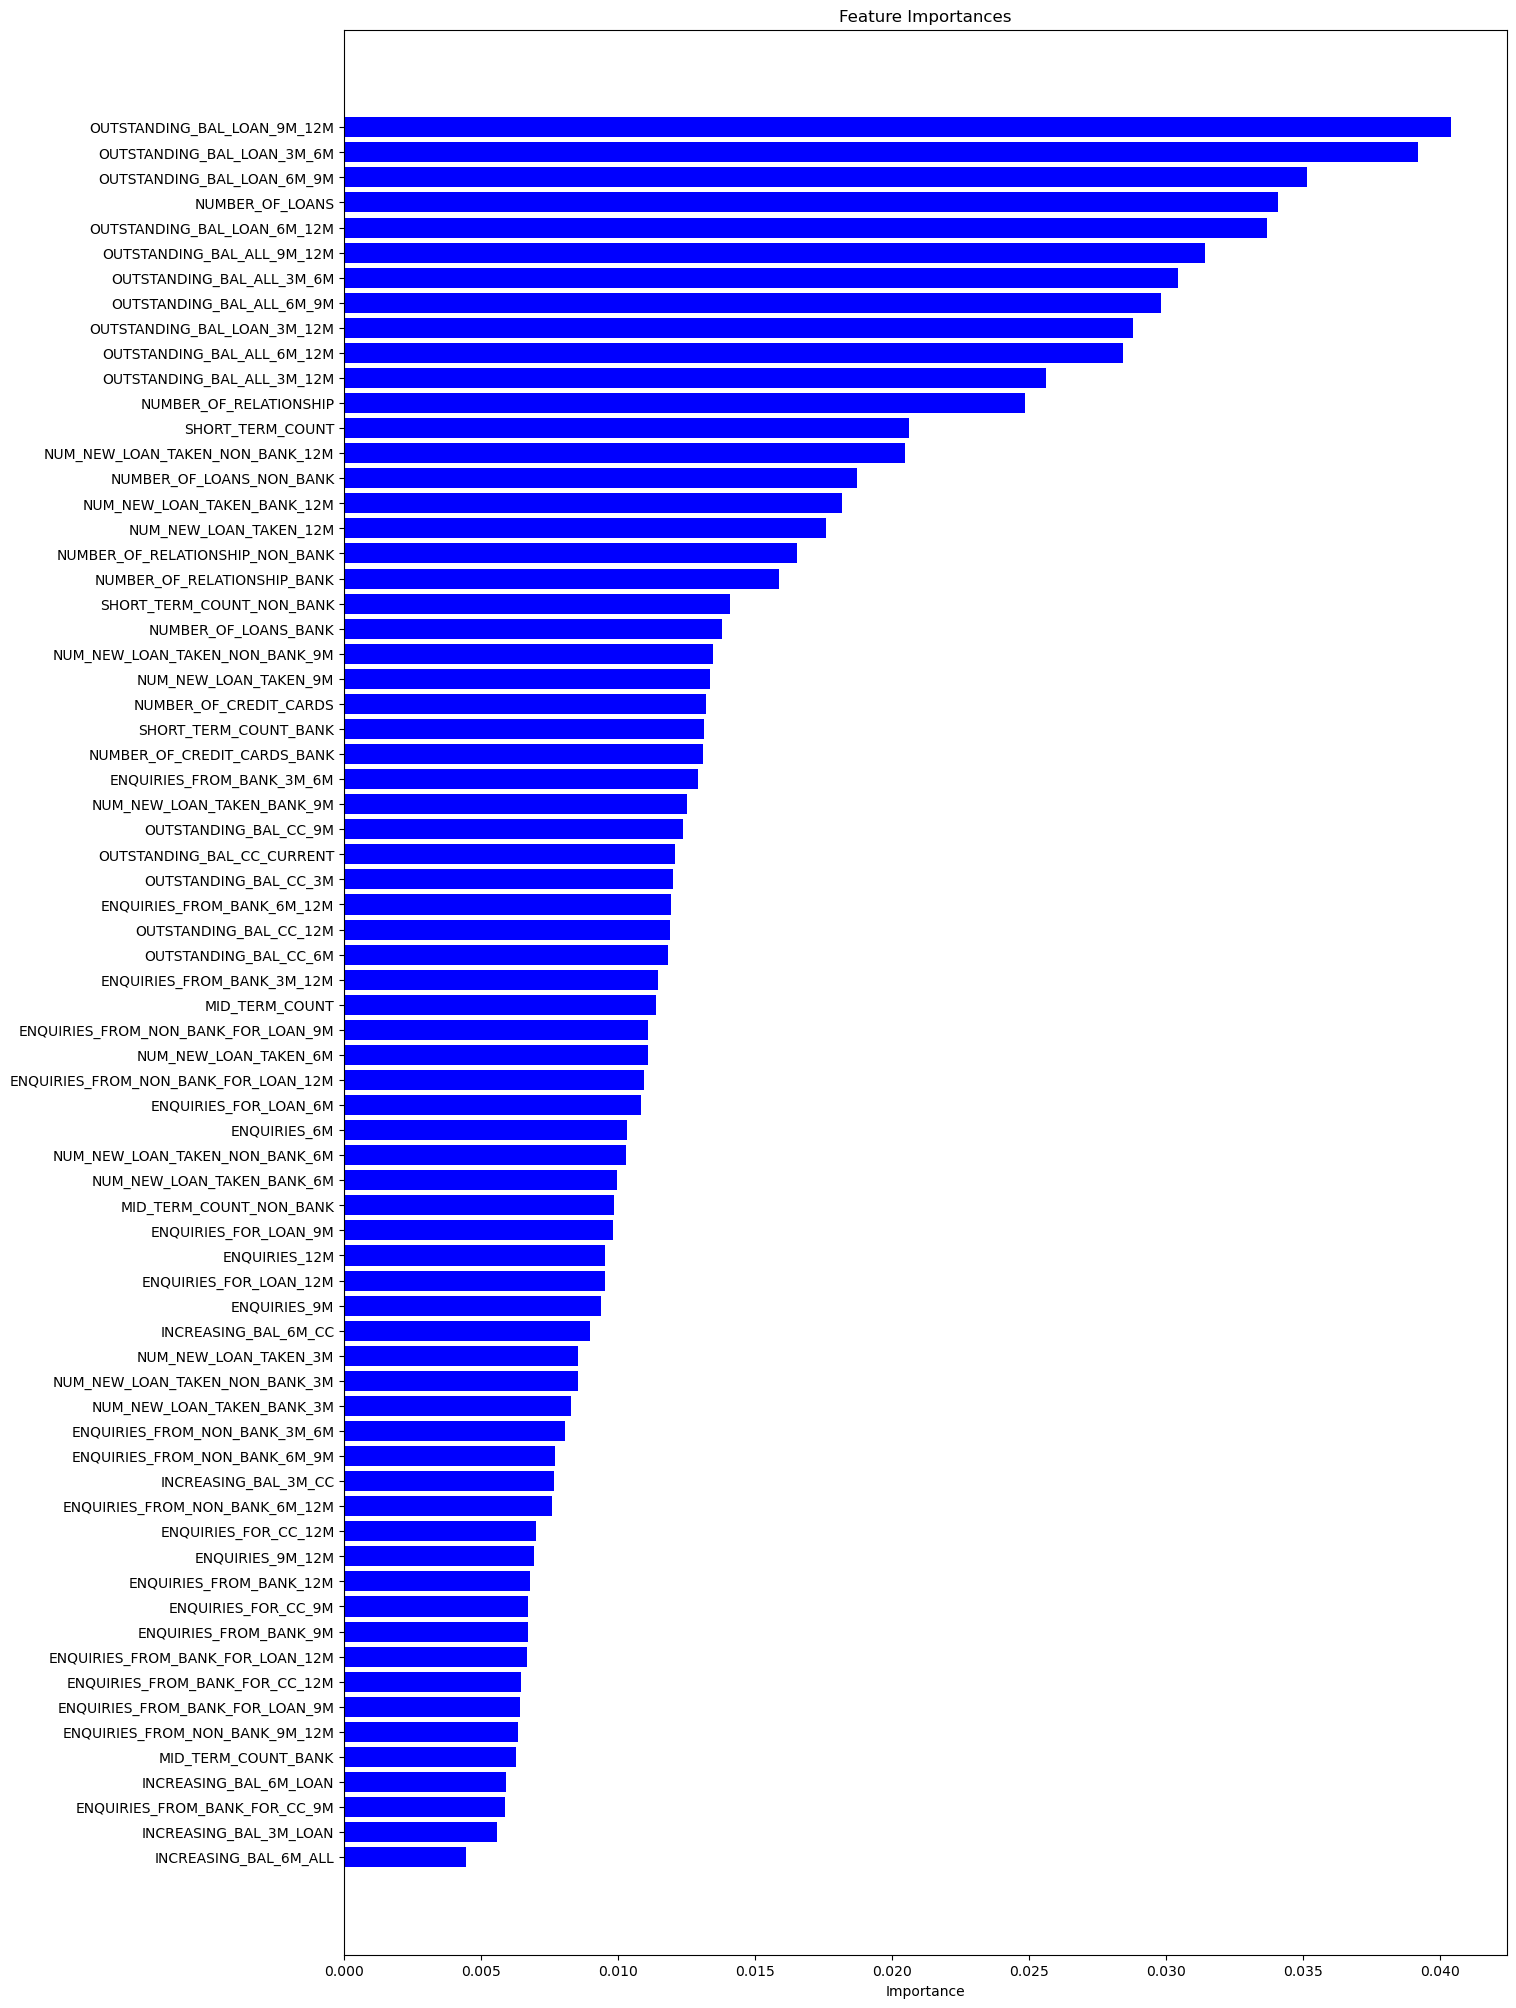

In [97]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.savefig('./Feature Importances.png')
plt.show()

1. **Những yếu tố quan trọng nhất:**
- `OUTSTANDING_BAL_LOAN_xM_yM` (Số chênh lệch giữa các số dư nợ của các khoản vay trong hai khoảng thời gian), `OUTSTANDING_BAL_ALL_xM_yM` (Số chênh lệch giữa tổng các số dư nợ cho tất cả các sản phẩm tài chính trong hai khoảng thời gian), `NUMBER_OF_LOANS` (Số lượng các khoản vay), `NUMBER_OF_RELATIONSHIP` (Tổng số mối quan hệ tài chính mà khách hàng có với ngân hàng - tổ chức phi ngân hàng) là những yếu tố đóng góp nhiều nhất cho việc dự đoán đầu ra của mô hình.
2. **Các yếu tố ít quan trọng hơn:**
- Ở phần cuối của biểu đồ, các đặc trưng như `INCREASING_BAL_GM_ALL` có tầm ảnh hưởng rất nhỏ. 
- Đây là những đặc trưng không ảnh hưởng nhiều đến kết quả của mô hình. Có thể được cân nhắc loại bỏ để tăng độ chính xác cho mô hình
3. **Yếu tố liên quan đến ngân hàng và phi ngân hàng:**
- Biểu đồ cũng phân biệt giữa các đặc trưng liên quan đến **BANK** (ngân hàng) và **NON_BANK** (phi ngân hàng). Dữ liệu liên quan đến ngân hàng, như `NUMBER_OF_LOANS_BANK`, có vẻ quan trọng hơn so với các yếu tố phi ngân hàng.
- Điều này có thể do dữ liệu từ ngân hàng thường đáng tin cậy hơn và đóng vai trò lớn hơn trong dự đoán.

In [114]:
feature_to_remove = feature_importances[feature_importances['importance']<0.01]['features']
print(feature_to_remove)

0                INCREASING_BAL_6M_ALL
1               INCREASING_BAL_3M_LOAN
2        ENQUIRIES_FROM_BANK_FOR_CC_9M
3               INCREASING_BAL_6M_LOAN
4                  MID_TERM_COUNT_BANK
5       ENQUIRIES_FROM_NON_BANK_9M_12M
6      ENQUIRIES_FROM_BANK_FOR_LOAN_9M
7       ENQUIRIES_FROM_BANK_FOR_CC_12M
8     ENQUIRIES_FROM_BANK_FOR_LOAN_12M
9               ENQUIRIES_FROM_BANK_9M
10                 ENQUIRIES_FOR_CC_9M
11             ENQUIRIES_FROM_BANK_12M
12                    ENQUIRIES_9M_12M
13                ENQUIRIES_FOR_CC_12M
14      ENQUIRIES_FROM_NON_BANK_6M_12M
15                INCREASING_BAL_3M_CC
16       ENQUIRIES_FROM_NON_BANK_6M_9M
17       ENQUIRIES_FROM_NON_BANK_3M_6M
18          NUM_NEW_LOAN_TAKEN_BANK_3M
19      NUM_NEW_LOAN_TAKEN_NON_BANK_3M
20               NUM_NEW_LOAN_TAKEN_3M
21                INCREASING_BAL_6M_CC
22                        ENQUIRIES_9M
23              ENQUIRIES_FOR_LOAN_12M
24                       ENQUIRIES_12M
25               ENQUIRIE

Nhận thấy có 28 cột có mức độ đóng góp cho việc dự đoán đầu ra của mô hình rất thấp (<0.01), nhóm quyết định loại bỏ số lượng cột này nhằm tránh gây nhiễu cho mô hình và cải thiện độ chính xác

In [115]:
X_train_selected_df = pd.DataFrame(X_train_selected, columns = selected_features_kbest)
X_test_selected_df = pd.DataFrame(X_test_selected, columns = selected_features_kbest)
X_train_final = X_train_selected_df.drop(columns = feature_to_remove)
X_test_final = X_test_selected_df.drop(columns = feature_to_remove)

model2 = ExtraTreesClassifier(n_estimators=1000, random_state = 42) 
model2.fit(X_train_final, y_train) 
y_pred = model2.predict(X_test_final)
tn_et, fp_et, fn_et, tp_et = metrics.confusion_matrix(y_test, y_pred).ravel()
accuracy_et = metrics.accuracy_score(y_test, y_pred)
precision_et = metrics.precision_score(y_test, y_pred)
recall_et = metrics.recall_score(y_test, y_pred)

print(f"True positives: {tp_et}")
print(f"False positives: {fp_et}")
print(f"True negatives: {tn_et}")
print(f"False negatives: {fn_et}\n")
print(f"Accuracy: {accuracy_et}")
print(f"Precision: {precision_et}")
print(f"Recall: {recall_et}")

True positives: 454
False positives: 58
True negatives: 4853
False negatives: 635

Accuracy: 0.8845
Precision: 0.88671875
Recall: 0.41689623507805323


- True Positives: Có 454 khách hàng mà mô hình dự đoán đúng rằng họ sẽ trả nợ quá hạn (tăng 5 trường hợp so với ban đầu).
- False Positives: Có 58 khách hàng mà mô hình dự đoán nhầm rằng họ sẽ trả nợ quá hạn, nhưng thực tế họ lại trả nợ đúng hạn (tăng 2 trường hợp so với ban đầu)
- True Negatives: Có 4853 khách hàng mà mô hình dự đoán đúng rằng họ sẽ trả nợ đúng hạn (giảm 2 trường hợp so với ban đầu)
- False Negatives: Có 635 khách hàng mà mô hình cho rằng họ sẽ trả nợ đúng hạn, nhưng thực tế lại trả nợ quá hạn (giảm 5 trường hợp so với ban đầu)
- Độ chính xác (88.45%): Tăng nhẹ so với mô hình trước khi loại bỏ một số feature, từ 88,4% lên 88,45% (tăng 0.05%)
- Precision (88.67%): Trong số những khách hàng mà mô hình dự đoán sẽ trả nợ chậm, có tới hơn 88% là dự đoán chính xác. Chỉ số này thấp hơn mô hình ban đầu là 88,91% (giảm 0.24%)
- Recall (41.67%): Mô hình phát hiện được gần 42% số khách hàng thực sự trả nợ quá hạn. Chỉ số này cao hơn so với mô hình ban đầu là 41,23% (tăng 0,44%)

Với việc loại bỏ các feature có ảnh hưởng rất ít đến đầu ra dự đoán của mô hình, độ chính xác và khả năng phát hiện được số khách hàng thực sự trả nợ quá hạn đã tăng nhẹ, khả năng dự đoán chính xác khách hàng sẽ trả nợ chậm lại bị giảm đi. Tuy nhiên mức giảm này bé gần gấp đôi so với mức tăng nên nhìn chung mô hình đã cải thiện được khả năng dự đoán. Điều này cũng giúp giảm đi các feature gây nhiễu trong việc xác định các yếu tố ảnh hưởng đến khả năng xác định khách hàng có trả nợ muộn hay không